In [119]:
import tensorflow as tf
import matplotlib.pyplot as plt 

from tensorflow.keras.optimizers import Adam

from gpu.negfc_models import get_model_new
from gpu.losses import reduce_std, wrapper
from gpu.data import load_data

import os
os.environ["CUDA_VISIBLE_DEVICES"] = "0"

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [120]:
%%time
root='./data/HCI/'
dataset, cube_shp, init_xy, init_flux = load_data(root, 
                                                  bkg_sigma=3, 
                                                  ncomp=2, 
                                                  num_peaks=10)

CPU times: user 4.11 s, sys: 173 ms, total: 4.29 s
Wall time: 3.12 s


In [121]:
loss_fn = wrapper(reduce_std, radius=2)

model = get_model_new(init_xy, init_flux, cube_shp)
model.compile(loss_fn=loss_fn, optimizer=Adam(5))

In [122]:
%%time
es = tf.keras.callbacks.EarlyStopping(
    monitor='loss', patience=20, min_delta=1e-4
)
hist = model.fit(dataset, epochs=100000, callbacks=[es])

Epoch 1/100000
1/1 [==============================] - 1s 856ms/step - loss: 13.7145
Epoch 2/100000
1/1 [==============================] - 0s 118ms/step - loss: 13.7095
Epoch 3/100000
1/1 [==============================] - 0s 113ms/step - loss: 13.7043
Epoch 4/100000
1/1 [==============================] - 0s 113ms/step - loss: 13.6992
Epoch 5/100000
1/1 [==============================] - 0s 115ms/step - loss: 13.6940
Epoch 6/100000
1/1 [==============================] - 0s 116ms/step - loss: 13.6890
Epoch 7/100000
1/1 [==============================] - 0s 121ms/step - loss: 13.6840
Epoch 8/100000
1/1 [==============================] - 0s 115ms/step - loss: 13.6790
Epoch 9/100000
1/1 [==============================] - 0s 115ms/step - loss: 13.6742
Epoch 10/100000
1/1 [==============================] - 0s 112ms/step - loss: 13.6695
Epoch 11/100000
1/1 [==============================] - 0s 100ms/step - loss: 13.6648
Epoch 12/100000
1/1 [==============================] - 0s 109ms/step - los

1/1 [==============================] - 0s 109ms/step - loss: 13.4999
Epoch 98/100000
1/1 [==============================] - 0s 99ms/step - loss: 13.4990
Epoch 99/100000
1/1 [==============================] - 0s 109ms/step - loss: 13.4981
Epoch 100/100000
1/1 [==============================] - 0s 116ms/step - loss: 13.4972
Epoch 101/100000
1/1 [==============================] - 0s 99ms/step - loss: 13.4963
Epoch 102/100000
1/1 [==============================] - 0s 104ms/step - loss: 13.4954
Epoch 103/100000
1/1 [==============================] - 0s 106ms/step - loss: 13.4945
Epoch 104/100000
1/1 [==============================] - 0s 116ms/step - loss: 13.4936
Epoch 105/100000
1/1 [==============================] - 0s 104ms/step - loss: 13.4927
Epoch 106/100000
1/1 [==============================] - 0s 111ms/step - loss: 13.4918
Epoch 107/100000
1/1 [==============================] - 0s 105ms/step - loss: 13.4910
Epoch 108/100000
1/1 [==============================] - 0s 102ms/step - los

1/1 [==============================] - 0s 115ms/step - loss: 13.4232
Epoch 193/100000
1/1 [==============================] - 0s 111ms/step - loss: 13.4224
Epoch 194/100000
1/1 [==============================] - 0s 116ms/step - loss: 13.4217
Epoch 195/100000
1/1 [==============================] - 0s 111ms/step - loss: 13.4209
Epoch 196/100000
1/1 [==============================] - 0s 112ms/step - loss: 13.4202
Epoch 197/100000
1/1 [==============================] - 0s 108ms/step - loss: 13.4194
Epoch 198/100000
1/1 [==============================] - 0s 123ms/step - loss: 13.4187
Epoch 199/100000
1/1 [==============================] - 0s 105ms/step - loss: 13.4179
Epoch 200/100000
1/1 [==============================] - 0s 113ms/step - loss: 13.4172
Epoch 201/100000
1/1 [==============================] - 0s 120ms/step - loss: 13.4165
Epoch 202/100000
1/1 [==============================] - 0s 109ms/step - loss: 13.4157
Epoch 203/100000
1/1 [==============================] - 0s 105ms/step -

1/1 [==============================] - 0s 102ms/step - loss: 13.3547
Epoch 288/100000
1/1 [==============================] - 0s 101ms/step - loss: 13.3540
Epoch 289/100000
1/1 [==============================] - 0s 102ms/step - loss: 13.3533
Epoch 290/100000
1/1 [==============================] - 0s 120ms/step - loss: 13.3526
Epoch 291/100000
1/1 [==============================] - 0s 102ms/step - loss: 13.3519
Epoch 292/100000
1/1 [==============================] - 0s 107ms/step - loss: 13.3512
Epoch 293/100000
1/1 [==============================] - 0s 106ms/step - loss: 13.3505
Epoch 294/100000
1/1 [==============================] - 0s 109ms/step - loss: 13.3498
Epoch 295/100000
1/1 [==============================] - 0s 112ms/step - loss: 13.3491
Epoch 296/100000
1/1 [==============================] - 0s 106ms/step - loss: 13.3484
Epoch 297/100000
1/1 [==============================] - 0s 112ms/step - loss: 13.3477
Epoch 298/100000
1/1 [==============================] - 0s 110ms/step -

1/1 [==============================] - 0s 113ms/step - loss: 13.2900
Epoch 383/100000
1/1 [==============================] - 0s 106ms/step - loss: 13.2893
Epoch 384/100000
1/1 [==============================] - 0s 112ms/step - loss: 13.2887
Epoch 385/100000
1/1 [==============================] - 0s 106ms/step - loss: 13.2880
Epoch 386/100000
1/1 [==============================] - 0s 105ms/step - loss: 13.2873
Epoch 387/100000
1/1 [==============================] - 0s 104ms/step - loss: 13.2867
Epoch 388/100000
1/1 [==============================] - 0s 108ms/step - loss: 13.2860
Epoch 389/100000
1/1 [==============================] - 0s 108ms/step - loss: 13.2854
Epoch 390/100000
1/1 [==============================] - 0s 100ms/step - loss: 13.2847
Epoch 391/100000
1/1 [==============================] - 0s 109ms/step - loss: 13.2840
Epoch 392/100000
1/1 [==============================] - 0s 108ms/step - loss: 13.2834
Epoch 393/100000
1/1 [==============================] - 0s 113ms/step -

1/1 [==============================] - 0s 111ms/step - loss: 13.2282
Epoch 478/100000
1/1 [==============================] - 0s 113ms/step - loss: 13.2275
Epoch 479/100000
1/1 [==============================] - 0s 105ms/step - loss: 13.2269
Epoch 480/100000
1/1 [==============================] - 0s 97ms/step - loss: 13.2262
Epoch 481/100000
1/1 [==============================] - 0s 101ms/step - loss: 13.2256
Epoch 482/100000
1/1 [==============================] - 0s 102ms/step - loss: 13.2250
Epoch 483/100000
1/1 [==============================] - 0s 106ms/step - loss: 13.2243
Epoch 484/100000
1/1 [==============================] - 0s 116ms/step - loss: 13.2237
Epoch 485/100000
1/1 [==============================] - 0s 110ms/step - loss: 13.2231
Epoch 486/100000
1/1 [==============================] - 0s 106ms/step - loss: 13.2224
Epoch 487/100000
1/1 [==============================] - 0s 105ms/step - loss: 13.2218
Epoch 488/100000
1/1 [==============================] - 0s 106ms/step - 

1/1 [==============================] - 0s 107ms/step - loss: 13.1686
Epoch 573/100000
1/1 [==============================] - 0s 111ms/step - loss: 13.1680
Epoch 574/100000
1/1 [==============================] - 0s 118ms/step - loss: 13.1674
Epoch 575/100000
1/1 [==============================] - 0s 108ms/step - loss: 13.1668
Epoch 576/100000
1/1 [==============================] - 0s 113ms/step - loss: 13.1662
Epoch 577/100000
1/1 [==============================] - 0s 132ms/step - loss: 13.1656
Epoch 578/100000
1/1 [==============================] - 0s 111ms/step - loss: 13.1650
Epoch 579/100000
1/1 [==============================] - 0s 114ms/step - loss: 13.1643
Epoch 580/100000
1/1 [==============================] - 0s 117ms/step - loss: 13.1637
Epoch 581/100000
1/1 [==============================] - 0s 107ms/step - loss: 13.1631
Epoch 582/100000
1/1 [==============================] - 0s 102ms/step - loss: 13.1625
Epoch 583/100000
1/1 [==============================] - 0s 109ms/step -

1/1 [==============================] - 0s 110ms/step - loss: 13.1112
Epoch 668/100000
1/1 [==============================] - 0s 98ms/step - loss: 13.1106
Epoch 669/100000
1/1 [==============================] - 0s 106ms/step - loss: 13.1100
Epoch 670/100000
1/1 [==============================] - 0s 117ms/step - loss: 13.1094
Epoch 671/100000
1/1 [==============================] - 0s 128ms/step - loss: 13.1088
Epoch 672/100000
1/1 [==============================] - 0s 126ms/step - loss: 13.1082
Epoch 673/100000
1/1 [==============================] - 0s 110ms/step - loss: 13.1076
Epoch 674/100000
1/1 [==============================] - 0s 106ms/step - loss: 13.1070
Epoch 675/100000
1/1 [==============================] - 0s 105ms/step - loss: 13.1064
Epoch 676/100000
1/1 [==============================] - 0s 108ms/step - loss: 13.1058
Epoch 677/100000
1/1 [==============================] - 0s 107ms/step - loss: 13.1052
Epoch 678/100000
1/1 [==============================] - 0s 109ms/step - 

1/1 [==============================] - 0s 113ms/step - loss: 13.0555
Epoch 763/100000
1/1 [==============================] - 0s 106ms/step - loss: 13.0549
Epoch 764/100000
1/1 [==============================] - 0s 112ms/step - loss: 13.0544
Epoch 765/100000
1/1 [==============================] - 0s 107ms/step - loss: 13.0538
Epoch 766/100000
1/1 [==============================] - 0s 107ms/step - loss: 13.0532
Epoch 767/100000
1/1 [==============================] - 0s 121ms/step - loss: 13.0526
Epoch 768/100000
1/1 [==============================] - 0s 109ms/step - loss: 13.0521
Epoch 769/100000
1/1 [==============================] - 0s 112ms/step - loss: 13.0515
Epoch 770/100000
1/1 [==============================] - 0s 112ms/step - loss: 13.0509
Epoch 771/100000
1/1 [==============================] - 0s 114ms/step - loss: 13.0503
Epoch 772/100000
1/1 [==============================] - 0s 128ms/step - loss: 13.0498
Epoch 773/100000
1/1 [==============================] - 0s 106ms/step -

1/1 [==============================] - 0s 105ms/step - loss: 13.0015
Epoch 858/100000
1/1 [==============================] - 0s 113ms/step - loss: 13.0010
Epoch 859/100000
1/1 [==============================] - 0s 107ms/step - loss: 13.0004
Epoch 860/100000
1/1 [==============================] - 0s 121ms/step - loss: 12.9998
Epoch 861/100000
1/1 [==============================] - 0s 140ms/step - loss: 12.9993
Epoch 862/100000
1/1 [==============================] - 0s 113ms/step - loss: 12.9987
Epoch 863/100000
1/1 [==============================] - 0s 119ms/step - loss: 12.9982
Epoch 864/100000
1/1 [==============================] - 0s 114ms/step - loss: 12.9976
Epoch 865/100000
1/1 [==============================] - 0s 114ms/step - loss: 12.9970
Epoch 866/100000
1/1 [==============================] - 0s 106ms/step - loss: 12.9965
Epoch 867/100000
1/1 [==============================] - 0s 104ms/step - loss: 12.9959
Epoch 868/100000
1/1 [==============================] - 0s 109ms/step -

1/1 [==============================] - 0s 109ms/step - loss: 12.9490
Epoch 953/100000
1/1 [==============================] - 0s 109ms/step - loss: 12.9485
Epoch 954/100000
1/1 [==============================] - 0s 122ms/step - loss: 12.9479
Epoch 955/100000
1/1 [==============================] - 0s 130ms/step - loss: 12.9474
Epoch 956/100000
1/1 [==============================] - 0s 110ms/step - loss: 12.9468
Epoch 957/100000
1/1 [==============================] - 0s 113ms/step - loss: 12.9463
Epoch 958/100000
1/1 [==============================] - 0s 111ms/step - loss: 12.9457
Epoch 959/100000
1/1 [==============================] - 0s 106ms/step - loss: 12.9452
Epoch 960/100000
1/1 [==============================] - 0s 108ms/step - loss: 12.9447
Epoch 961/100000
1/1 [==============================] - 0s 112ms/step - loss: 12.9441
Epoch 962/100000
1/1 [==============================] - 0s 98ms/step - loss: 12.9436
Epoch 963/100000
1/1 [==============================] - 0s 103ms/step - 

1/1 [==============================] - 0s 97ms/step - loss: 12.8979
Epoch 1048/100000
1/1 [==============================] - 0s 105ms/step - loss: 12.8974
Epoch 1049/100000
1/1 [==============================] - 0s 106ms/step - loss: 12.8968
Epoch 1050/100000
1/1 [==============================] - 0s 113ms/step - loss: 12.8963
Epoch 1051/100000
1/1 [==============================] - 0s 107ms/step - loss: 12.8958
Epoch 1052/100000
1/1 [==============================] - 0s 115ms/step - loss: 12.8952
Epoch 1053/100000
1/1 [==============================] - 0s 103ms/step - loss: 12.8947
Epoch 1054/100000
1/1 [==============================] - 0s 107ms/step - loss: 12.8942
Epoch 1055/100000
1/1 [==============================] - 0s 107ms/step - loss: 12.8936
Epoch 1056/100000
1/1 [==============================] - 0s 101ms/step - loss: 12.8931
Epoch 1057/100000
1/1 [==============================] - 0s 98ms/step - loss: 12.8926
Epoch 1058/100000
1/1 [==============================] - 0s 105

1/1 [==============================] - 0s 104ms/step - loss: 12.8486
Epoch 1142/100000
1/1 [==============================] - 0s 114ms/step - loss: 12.8480
Epoch 1143/100000
1/1 [==============================] - 0s 125ms/step - loss: 12.8475
Epoch 1144/100000
1/1 [==============================] - 0s 105ms/step - loss: 12.8470
Epoch 1145/100000
1/1 [==============================] - 0s 111ms/step - loss: 12.8465
Epoch 1146/100000
1/1 [==============================] - 0s 111ms/step - loss: 12.8460
Epoch 1147/100000
1/1 [==============================] - 0s 101ms/step - loss: 12.8454
Epoch 1148/100000
1/1 [==============================] - 0s 103ms/step - loss: 12.8449
Epoch 1149/100000
1/1 [==============================] - 0s 108ms/step - loss: 12.8444
Epoch 1150/100000
1/1 [==============================] - 0s 98ms/step - loss: 12.8439
Epoch 1151/100000
1/1 [==============================] - 0s 113ms/step - loss: 12.8434
Epoch 1152/100000
1/1 [==============================] - 0s 11

1/1 [==============================] - 0s 109ms/step - loss: 12.8004
Epoch 1236/100000
1/1 [==============================] - 0s 105ms/step - loss: 12.7999
Epoch 1237/100000
1/1 [==============================] - 0s 104ms/step - loss: 12.7994
Epoch 1238/100000
1/1 [==============================] - 0s 105ms/step - loss: 12.7989
Epoch 1239/100000
1/1 [==============================] - 0s 103ms/step - loss: 12.7984
Epoch 1240/100000
1/1 [==============================] - 0s 111ms/step - loss: 12.7979
Epoch 1241/100000
1/1 [==============================] - 0s 105ms/step - loss: 12.7973
Epoch 1242/100000
1/1 [==============================] - 0s 109ms/step - loss: 12.7968
Epoch 1243/100000
1/1 [==============================] - 0s 100ms/step - loss: 12.7963
Epoch 1244/100000
1/1 [==============================] - 0s 103ms/step - loss: 12.7958
Epoch 1245/100000
1/1 [==============================] - 0s 109ms/step - loss: 12.7953
Epoch 1246/100000
1/1 [==============================] - 0s 1

1/1 [==============================] - 0s 105ms/step - loss: 12.7533
Epoch 1330/100000
1/1 [==============================] - 0s 104ms/step - loss: 12.7528
Epoch 1331/100000
1/1 [==============================] - 0s 115ms/step - loss: 12.7523
Epoch 1332/100000
1/1 [==============================] - 0s 112ms/step - loss: 12.7518
Epoch 1333/100000
1/1 [==============================] - 0s 124ms/step - loss: 12.7513
Epoch 1334/100000
1/1 [==============================] - 0s 98ms/step - loss: 12.7508
Epoch 1335/100000
1/1 [==============================] - 0s 106ms/step - loss: 12.7503
Epoch 1336/100000
1/1 [==============================] - 0s 112ms/step - loss: 12.7498
Epoch 1337/100000
1/1 [==============================] - 0s 106ms/step - loss: 12.7493
Epoch 1338/100000
1/1 [==============================] - 0s 110ms/step - loss: 12.7489
Epoch 1339/100000
1/1 [==============================] - 0s 106ms/step - loss: 12.7484
Epoch 1340/100000
1/1 [==============================] - 0s 10

1/1 [==============================] - 0s 117ms/step - loss: 12.7073
Epoch 1424/100000
1/1 [==============================] - 0s 119ms/step - loss: 12.7068
Epoch 1425/100000
1/1 [==============================] - 0s 105ms/step - loss: 12.7063
Epoch 1426/100000
1/1 [==============================] - 0s 114ms/step - loss: 12.7058
Epoch 1427/100000
1/1 [==============================] - 0s 106ms/step - loss: 12.7053
Epoch 1428/100000
1/1 [==============================] - 0s 102ms/step - loss: 12.7048
Epoch 1429/100000
1/1 [==============================] - 0s 100ms/step - loss: 12.7043
Epoch 1430/100000
1/1 [==============================] - 0s 103ms/step - loss: 12.7039
Epoch 1431/100000
1/1 [==============================] - 0s 101ms/step - loss: 12.7034
Epoch 1432/100000
1/1 [==============================] - 0s 109ms/step - loss: 12.7029
Epoch 1433/100000
1/1 [==============================] - 0s 105ms/step - loss: 12.7024
Epoch 1434/100000
1/1 [==============================] - 0s 1

1/1 [==============================] - 0s 103ms/step - loss: 12.6622
Epoch 1518/100000
1/1 [==============================] - 0s 105ms/step - loss: 12.6617
Epoch 1519/100000
1/1 [==============================] - 0s 103ms/step - loss: 12.6612
Epoch 1520/100000
1/1 [==============================] - 0s 110ms/step - loss: 12.6608
Epoch 1521/100000
1/1 [==============================] - 0s 106ms/step - loss: 12.6603
Epoch 1522/100000
1/1 [==============================] - 0s 105ms/step - loss: 12.6598
Epoch 1523/100000
1/1 [==============================] - 0s 119ms/step - loss: 12.6593
Epoch 1524/100000
1/1 [==============================] - 0s 105ms/step - loss: 12.6589
Epoch 1525/100000
1/1 [==============================] - 0s 106ms/step - loss: 12.6584
Epoch 1526/100000
1/1 [==============================] - 0s 129ms/step - loss: 12.6579
Epoch 1527/100000
1/1 [==============================] - 0s 116ms/step - loss: 12.6574
Epoch 1528/100000
1/1 [==============================] - 0s 1

1/1 [==============================] - 0s 101ms/step - loss: 12.6180
Epoch 1612/100000
1/1 [==============================] - 0s 97ms/step - loss: 12.6176
Epoch 1613/100000
1/1 [==============================] - 0s 111ms/step - loss: 12.6171
Epoch 1614/100000
1/1 [==============================] - 0s 111ms/step - loss: 12.6166
Epoch 1615/100000
1/1 [==============================] - 0s 118ms/step - loss: 12.6162
Epoch 1616/100000
1/1 [==============================] - 0s 103ms/step - loss: 12.6157
Epoch 1617/100000
1/1 [==============================] - 0s 114ms/step - loss: 12.6153
Epoch 1618/100000
1/1 [==============================] - 0s 113ms/step - loss: 12.6148
Epoch 1619/100000
1/1 [==============================] - 0s 103ms/step - loss: 12.6143
Epoch 1620/100000
1/1 [==============================] - 0s 115ms/step - loss: 12.6139
Epoch 1621/100000
1/1 [==============================] - 0s 108ms/step - loss: 12.6134
Epoch 1622/100000
1/1 [==============================] - 0s 10

1/1 [==============================] - 0s 104ms/step - loss: 12.5748
Epoch 1706/100000
1/1 [==============================] - 0s 112ms/step - loss: 12.5743
Epoch 1707/100000
1/1 [==============================] - 0s 101ms/step - loss: 12.5739
Epoch 1708/100000
1/1 [==============================] - 0s 107ms/step - loss: 12.5734
Epoch 1709/100000
1/1 [==============================] - 0s 110ms/step - loss: 12.5730
Epoch 1710/100000
1/1 [==============================] - 0s 107ms/step - loss: 12.5725
Epoch 1711/100000
1/1 [==============================] - 0s 107ms/step - loss: 12.5721
Epoch 1712/100000
1/1 [==============================] - 0s 110ms/step - loss: 12.5716
Epoch 1713/100000
1/1 [==============================] - 0s 108ms/step - loss: 12.5712
Epoch 1714/100000
1/1 [==============================] - 0s 116ms/step - loss: 12.5707
Epoch 1715/100000
1/1 [==============================] - 0s 105ms/step - loss: 12.5702
Epoch 1716/100000
1/1 [==============================] - 0s 1

1/1 [==============================] - 0s 105ms/step - loss: 12.5324
Epoch 1800/100000
1/1 [==============================] - 0s 115ms/step - loss: 12.5320
Epoch 1801/100000
1/1 [==============================] - 0s 104ms/step - loss: 12.5315
Epoch 1802/100000
1/1 [==============================] - 0s 104ms/step - loss: 12.5311
Epoch 1803/100000
1/1 [==============================] - 0s 103ms/step - loss: 12.5306
Epoch 1804/100000
1/1 [==============================] - 0s 105ms/step - loss: 12.5302
Epoch 1805/100000
1/1 [==============================] - 0s 112ms/step - loss: 12.5297
Epoch 1806/100000
1/1 [==============================] - 0s 104ms/step - loss: 12.5293
Epoch 1807/100000
1/1 [==============================] - 0s 105ms/step - loss: 12.5288
Epoch 1808/100000
1/1 [==============================] - 0s 105ms/step - loss: 12.5284
Epoch 1809/100000
1/1 [==============================] - 0s 116ms/step - loss: 12.5279
Epoch 1810/100000
1/1 [==============================] - 0s 1

1/1 [==============================] - 0s 103ms/step - loss: 12.4909
Epoch 1894/100000
1/1 [==============================] - 0s 94ms/step - loss: 12.4904
Epoch 1895/100000
1/1 [==============================] - 0s 107ms/step - loss: 12.4900
Epoch 1896/100000
1/1 [==============================] - 0s 101ms/step - loss: 12.4895
Epoch 1897/100000
1/1 [==============================] - 0s 103ms/step - loss: 12.4891
Epoch 1898/100000
1/1 [==============================] - 0s 114ms/step - loss: 12.4887
Epoch 1899/100000
1/1 [==============================] - 0s 102ms/step - loss: 12.4882
Epoch 1900/100000
1/1 [==============================] - 0s 102ms/step - loss: 12.4878
Epoch 1901/100000
1/1 [==============================] - 0s 105ms/step - loss: 12.4874
Epoch 1902/100000
1/1 [==============================] - 0s 113ms/step - loss: 12.4869
Epoch 1903/100000
1/1 [==============================] - 0s 110ms/step - loss: 12.4865
Epoch 1904/100000
1/1 [==============================] - 0s 10

1/1 [==============================] - 0s 102ms/step - loss: 12.4501
Epoch 1988/100000
1/1 [==============================] - 0s 112ms/step - loss: 12.4497
Epoch 1989/100000
1/1 [==============================] - 0s 115ms/step - loss: 12.4492
Epoch 1990/100000
1/1 [==============================] - 0s 108ms/step - loss: 12.4488
Epoch 1991/100000
1/1 [==============================] - 0s 134ms/step - loss: 12.4484
Epoch 1992/100000
1/1 [==============================] - 0s 112ms/step - loss: 12.4480
Epoch 1993/100000
1/1 [==============================] - 0s 109ms/step - loss: 12.4475
Epoch 1994/100000
1/1 [==============================] - 0s 107ms/step - loss: 12.4471
Epoch 1995/100000
1/1 [==============================] - 0s 102ms/step - loss: 12.4467
Epoch 1996/100000
1/1 [==============================] - 0s 91ms/step - loss: 12.4462
Epoch 1997/100000
1/1 [==============================] - 0s 108ms/step - loss: 12.4458
Epoch 1998/100000
1/1 [==============================] - 0s 11

1/1 [==============================] - 0s 109ms/step - loss: 12.4101
Epoch 2082/100000
1/1 [==============================] - 0s 112ms/step - loss: 12.4097
Epoch 2083/100000
1/1 [==============================] - 0s 108ms/step - loss: 12.4093
Epoch 2084/100000
1/1 [==============================] - 0s 99ms/step - loss: 12.4089
Epoch 2085/100000
1/1 [==============================] - 0s 103ms/step - loss: 12.4084
Epoch 2086/100000
1/1 [==============================] - 0s 109ms/step - loss: 12.4080
Epoch 2087/100000
1/1 [==============================] - 0s 89ms/step - loss: 12.4076
Epoch 2088/100000
1/1 [==============================] - 0s 94ms/step - loss: 12.4072
Epoch 2089/100000
1/1 [==============================] - 0s 101ms/step - loss: 12.4068
Epoch 2090/100000
1/1 [==============================] - 0s 104ms/step - loss: 12.4063
Epoch 2091/100000
1/1 [==============================] - 0s 107ms/step - loss: 12.4059
Epoch 2092/100000
1/1 [==============================] - 0s 104m

1/1 [==============================] - 0s 125ms/step - loss: 12.3709
Epoch 2176/100000
1/1 [==============================] - 0s 100ms/step - loss: 12.3705
Epoch 2177/100000
1/1 [==============================] - 0s 106ms/step - loss: 12.3701
Epoch 2178/100000
1/1 [==============================] - 0s 100ms/step - loss: 12.3697
Epoch 2179/100000
1/1 [==============================] - 0s 106ms/step - loss: 12.3693
Epoch 2180/100000
1/1 [==============================] - 0s 105ms/step - loss: 12.3688
Epoch 2181/100000
1/1 [==============================] - 0s 109ms/step - loss: 12.3684
Epoch 2182/100000
1/1 [==============================] - 0s 101ms/step - loss: 12.3680
Epoch 2183/100000
1/1 [==============================] - 0s 112ms/step - loss: 12.3676
Epoch 2184/100000
1/1 [==============================] - 0s 109ms/step - loss: 12.3672
Epoch 2185/100000
1/1 [==============================] - 0s 106ms/step - loss: 12.3668
Epoch 2186/100000
1/1 [==============================] - 0s 1

1/1 [==============================] - 0s 107ms/step - loss: 12.3324
Epoch 2270/100000
1/1 [==============================] - 0s 113ms/step - loss: 12.3320
Epoch 2271/100000
1/1 [==============================] - 0s 111ms/step - loss: 12.3316
Epoch 2272/100000
1/1 [==============================] - 0s 113ms/step - loss: 12.3312
Epoch 2273/100000
1/1 [==============================] - 0s 104ms/step - loss: 12.3308
Epoch 2274/100000
1/1 [==============================] - 0s 100ms/step - loss: 12.3304
Epoch 2275/100000
1/1 [==============================] - 0s 113ms/step - loss: 12.3300
Epoch 2276/100000
1/1 [==============================] - 0s 109ms/step - loss: 12.3296
Epoch 2277/100000
1/1 [==============================] - 0s 108ms/step - loss: 12.3292
Epoch 2278/100000
1/1 [==============================] - 0s 124ms/step - loss: 12.3288
Epoch 2279/100000
1/1 [==============================] - 0s 132ms/step - loss: 12.3284
Epoch 2280/100000
1/1 [==============================] - 0s 1

1/1 [==============================] - 0s 108ms/step - loss: 12.2946
Epoch 2364/100000
1/1 [==============================] - 0s 106ms/step - loss: 12.2942
Epoch 2365/100000
1/1 [==============================] - 0s 109ms/step - loss: 12.2938
Epoch 2366/100000
1/1 [==============================] - 0s 112ms/step - loss: 12.2934
Epoch 2367/100000
1/1 [==============================] - 0s 120ms/step - loss: 12.2930
Epoch 2368/100000
1/1 [==============================] - 0s 112ms/step - loss: 12.2926
Epoch 2369/100000
1/1 [==============================] - 0s 106ms/step - loss: 12.2922
Epoch 2370/100000
1/1 [==============================] - 0s 105ms/step - loss: 12.2919
Epoch 2371/100000
1/1 [==============================] - 0s 106ms/step - loss: 12.2915
Epoch 2372/100000
1/1 [==============================] - 0s 99ms/step - loss: 12.2911
Epoch 2373/100000
1/1 [==============================] - 0s 106ms/step - loss: 12.2907
Epoch 2374/100000
1/1 [==============================] - 0s 10

1/1 [==============================] - 0s 113ms/step - loss: 12.2575
Epoch 2458/100000
1/1 [==============================] - 0s 109ms/step - loss: 12.2572
Epoch 2459/100000
1/1 [==============================] - 0s 100ms/step - loss: 12.2568
Epoch 2460/100000
1/1 [==============================] - 0s 106ms/step - loss: 12.2564
Epoch 2461/100000
1/1 [==============================] - 0s 101ms/step - loss: 12.2560
Epoch 2462/100000
1/1 [==============================] - 0s 104ms/step - loss: 12.2556
Epoch 2463/100000
1/1 [==============================] - 0s 99ms/step - loss: 12.2552
Epoch 2464/100000
1/1 [==============================] - 0s 99ms/step - loss: 12.2548
Epoch 2465/100000
1/1 [==============================] - 0s 115ms/step - loss: 12.2544
Epoch 2466/100000
1/1 [==============================] - 0s 108ms/step - loss: 12.2540
Epoch 2467/100000
1/1 [==============================] - 0s 118ms/step - loss: 12.2536
Epoch 2468/100000
1/1 [==============================] - 0s 119

1/1 [==============================] - 0s 100ms/step - loss: 12.2211
Epoch 2552/100000
1/1 [==============================] - 0s 106ms/step - loss: 12.2207
Epoch 2553/100000
1/1 [==============================] - 0s 95ms/step - loss: 12.2204
Epoch 2554/100000
1/1 [==============================] - 0s 123ms/step - loss: 12.2200
Epoch 2555/100000
1/1 [==============================] - 0s 106ms/step - loss: 12.2196
Epoch 2556/100000
1/1 [==============================] - 0s 110ms/step - loss: 12.2192
Epoch 2557/100000
1/1 [==============================] - 0s 103ms/step - loss: 12.2188
Epoch 2558/100000
1/1 [==============================] - 0s 110ms/step - loss: 12.2184
Epoch 2559/100000
1/1 [==============================] - 0s 112ms/step - loss: 12.2181
Epoch 2560/100000
1/1 [==============================] - 0s 105ms/step - loss: 12.2177
Epoch 2561/100000
1/1 [==============================] - 0s 104ms/step - loss: 12.2173
Epoch 2562/100000
1/1 [==============================] - 0s 11

1/1 [==============================] - 0s 101ms/step - loss: 12.1854
Epoch 2646/100000
1/1 [==============================] - 0s 110ms/step - loss: 12.1850
Epoch 2647/100000
1/1 [==============================] - 0s 106ms/step - loss: 12.1846
Epoch 2648/100000
1/1 [==============================] - 0s 103ms/step - loss: 12.1842
Epoch 2649/100000
1/1 [==============================] - 0s 113ms/step - loss: 12.1839
Epoch 2650/100000
1/1 [==============================] - 0s 100ms/step - loss: 12.1835
Epoch 2651/100000
1/1 [==============================] - 0s 108ms/step - loss: 12.1831
Epoch 2652/100000
1/1 [==============================] - 0s 113ms/step - loss: 12.1827
Epoch 2653/100000
1/1 [==============================] - 0s 109ms/step - loss: 12.1823
Epoch 2654/100000
1/1 [==============================] - 0s 108ms/step - loss: 12.1820
Epoch 2655/100000
1/1 [==============================] - 0s 111ms/step - loss: 12.1816
Epoch 2656/100000
1/1 [==============================] - 0s 1

1/1 [==============================] - 0s 105ms/step - loss: 12.1502
Epoch 2740/100000
1/1 [==============================] - 0s 109ms/step - loss: 12.1499
Epoch 2741/100000
1/1 [==============================] - 0s 112ms/step - loss: 12.1495
Epoch 2742/100000
1/1 [==============================] - 0s 117ms/step - loss: 12.1491
Epoch 2743/100000
1/1 [==============================] - 0s 121ms/step - loss: 12.1488
Epoch 2744/100000
1/1 [==============================] - 0s 112ms/step - loss: 12.1484
Epoch 2745/100000
1/1 [==============================] - 0s 110ms/step - loss: 12.1480
Epoch 2746/100000
1/1 [==============================] - 0s 100ms/step - loss: 12.1476
Epoch 2747/100000
1/1 [==============================] - 0s 103ms/step - loss: 12.1473
Epoch 2748/100000
1/1 [==============================] - 0s 111ms/step - loss: 12.1469
Epoch 2749/100000
1/1 [==============================] - 0s 113ms/step - loss: 12.1465
Epoch 2750/100000
1/1 [==============================] - 0s 1

1/1 [==============================] - 0s 99ms/step - loss: 12.1157
Epoch 2834/100000
1/1 [==============================] - 0s 99ms/step - loss: 12.1154
Epoch 2835/100000
1/1 [==============================] - 0s 105ms/step - loss: 12.1150
Epoch 2836/100000
1/1 [==============================] - 0s 109ms/step - loss: 12.1146
Epoch 2837/100000
1/1 [==============================] - 0s 118ms/step - loss: 12.1143
Epoch 2838/100000
1/1 [==============================] - 0s 111ms/step - loss: 12.1139
Epoch 2839/100000
1/1 [==============================] - 0s 104ms/step - loss: 12.1135
Epoch 2840/100000
1/1 [==============================] - 0s 114ms/step - loss: 12.1132
Epoch 2841/100000
1/1 [==============================] - 0s 112ms/step - loss: 12.1128
Epoch 2842/100000
1/1 [==============================] - 0s 98ms/step - loss: 12.1124
Epoch 2843/100000
1/1 [==============================] - 0s 105ms/step - loss: 12.1121
Epoch 2844/100000
1/1 [==============================] - 0s 112m

1/1 [==============================] - 0s 100ms/step - loss: 12.0818
Epoch 2928/100000
1/1 [==============================] - 0s 102ms/step - loss: 12.0814
Epoch 2929/100000
1/1 [==============================] - 0s 109ms/step - loss: 12.0811
Epoch 2930/100000
1/1 [==============================] - 0s 108ms/step - loss: 12.0807
Epoch 2931/100000
1/1 [==============================] - 0s 103ms/step - loss: 12.0804
Epoch 2932/100000
1/1 [==============================] - 0s 106ms/step - loss: 12.0800
Epoch 2933/100000
1/1 [==============================] - 0s 109ms/step - loss: 12.0797
Epoch 2934/100000
1/1 [==============================] - 0s 114ms/step - loss: 12.0793
Epoch 2935/100000
1/1 [==============================] - 0s 120ms/step - loss: 12.0789
Epoch 2936/100000
1/1 [==============================] - 0s 105ms/step - loss: 12.0786
Epoch 2937/100000
1/1 [==============================] - 0s 101ms/step - loss: 12.0782
Epoch 2938/100000
1/1 [==============================] - 0s 1

1/1 [==============================] - 0s 105ms/step - loss: 12.0485
Epoch 3022/100000
1/1 [==============================] - 0s 106ms/step - loss: 12.0481
Epoch 3023/100000
1/1 [==============================] - 0s 136ms/step - loss: 12.0478
Epoch 3024/100000
1/1 [==============================] - 0s 115ms/step - loss: 12.0474
Epoch 3025/100000
1/1 [==============================] - 0s 102ms/step - loss: 12.0471
Epoch 3026/100000
1/1 [==============================] - 0s 96ms/step - loss: 12.0467
Epoch 3027/100000
1/1 [==============================] - 0s 112ms/step - loss: 12.0464
Epoch 3028/100000
1/1 [==============================] - 0s 113ms/step - loss: 12.0460
Epoch 3029/100000
1/1 [==============================] - 0s 101ms/step - loss: 12.0457
Epoch 3030/100000
1/1 [==============================] - 0s 107ms/step - loss: 12.0453
Epoch 3031/100000
1/1 [==============================] - 0s 107ms/step - loss: 12.0450
Epoch 3032/100000
1/1 [==============================] - 0s 10

1/1 [==============================] - 0s 107ms/step - loss: 12.0157
Epoch 3116/100000
1/1 [==============================] - 0s 107ms/step - loss: 12.0154
Epoch 3117/100000
1/1 [==============================] - 0s 115ms/step - loss: 12.0150
Epoch 3118/100000
1/1 [==============================] - 0s 109ms/step - loss: 12.0147
Epoch 3119/100000
1/1 [==============================] - 0s 95ms/step - loss: 12.0143
Epoch 3120/100000
1/1 [==============================] - 0s 97ms/step - loss: 12.0140
Epoch 3121/100000
1/1 [==============================] - 0s 116ms/step - loss: 12.0136
Epoch 3122/100000
1/1 [==============================] - 0s 113ms/step - loss: 12.0133
Epoch 3123/100000
1/1 [==============================] - 0s 117ms/step - loss: 12.0129
Epoch 3124/100000
1/1 [==============================] - 0s 133ms/step - loss: 12.0126
Epoch 3125/100000
1/1 [==============================] - 0s 129ms/step - loss: 12.0122
Epoch 3126/100000
1/1 [==============================] - 0s 122

1/1 [==============================] - 0s 118ms/step - loss: 11.9835
Epoch 3210/100000
1/1 [==============================] - 0s 98ms/step - loss: 11.9831
Epoch 3211/100000
1/1 [==============================] - 0s 119ms/step - loss: 11.9828
Epoch 3212/100000
1/1 [==============================] - 0s 124ms/step - loss: 11.9825
Epoch 3213/100000
1/1 [==============================] - 0s 96ms/step - loss: 11.9821
Epoch 3214/100000
1/1 [==============================] - 0s 113ms/step - loss: 11.9818
Epoch 3215/100000
1/1 [==============================] - 0s 102ms/step - loss: 11.9815
Epoch 3216/100000
1/1 [==============================] - 0s 112ms/step - loss: 11.9811
Epoch 3217/100000
1/1 [==============================] - 0s 113ms/step - loss: 11.9808
Epoch 3218/100000
1/1 [==============================] - 0s 107ms/step - loss: 11.9804
Epoch 3219/100000
1/1 [==============================] - 0s 113ms/step - loss: 11.9801
Epoch 3220/100000
1/1 [==============================] - 0s 110

1/1 [==============================] - 0s 98ms/step - loss: 11.9518
Epoch 3304/100000
1/1 [==============================] - 0s 102ms/step - loss: 11.9515
Epoch 3305/100000
1/1 [==============================] - 0s 104ms/step - loss: 11.9512
Epoch 3306/100000
1/1 [==============================] - 0s 96ms/step - loss: 11.9508
Epoch 3307/100000
1/1 [==============================] - 0s 101ms/step - loss: 11.9505
Epoch 3308/100000
1/1 [==============================] - 0s 106ms/step - loss: 11.9501
Epoch 3309/100000
1/1 [==============================] - 0s 108ms/step - loss: 11.9498
Epoch 3310/100000
1/1 [==============================] - 0s 105ms/step - loss: 11.9495
Epoch 3311/100000
1/1 [==============================] - 0s 96ms/step - loss: 11.9491
Epoch 3312/100000
1/1 [==============================] - 0s 101ms/step - loss: 11.9488
Epoch 3313/100000
1/1 [==============================] - 0s 111ms/step - loss: 11.9485
Epoch 3314/100000
1/1 [==============================] - 0s 109m

1/1 [==============================] - 0s 111ms/step - loss: 11.9207
Epoch 3398/100000
1/1 [==============================] - 0s 108ms/step - loss: 11.9204
Epoch 3399/100000
1/1 [==============================] - 0s 108ms/step - loss: 11.9200
Epoch 3400/100000
1/1 [==============================] - 0s 107ms/step - loss: 11.9197
Epoch 3401/100000
1/1 [==============================] - 0s 111ms/step - loss: 11.9194
Epoch 3402/100000
1/1 [==============================] - 0s 104ms/step - loss: 11.9190
Epoch 3403/100000
1/1 [==============================] - 0s 111ms/step - loss: 11.9187
Epoch 3404/100000
1/1 [==============================] - 0s 103ms/step - loss: 11.9184
Epoch 3405/100000
1/1 [==============================] - 0s 104ms/step - loss: 11.9181
Epoch 3406/100000
1/1 [==============================] - 0s 112ms/step - loss: 11.9177
Epoch 3407/100000
1/1 [==============================] - 0s 104ms/step - loss: 11.9174
Epoch 3408/100000
1/1 [==============================] - 0s 1

1/1 [==============================] - 0s 110ms/step - loss: 11.8901
Epoch 3492/100000
1/1 [==============================] - 0s 103ms/step - loss: 11.8897
Epoch 3493/100000
1/1 [==============================] - 0s 105ms/step - loss: 11.8894
Epoch 3494/100000
1/1 [==============================] - 0s 118ms/step - loss: 11.8891
Epoch 3495/100000
1/1 [==============================] - 0s 105ms/step - loss: 11.8888
Epoch 3496/100000
1/1 [==============================] - 0s 99ms/step - loss: 11.8884
Epoch 3497/100000
1/1 [==============================] - 0s 110ms/step - loss: 11.8881
Epoch 3498/100000
1/1 [==============================] - 0s 103ms/step - loss: 11.8878
Epoch 3499/100000
1/1 [==============================] - 0s 102ms/step - loss: 11.8875
Epoch 3500/100000
1/1 [==============================] - 0s 112ms/step - loss: 11.8871
Epoch 3501/100000
1/1 [==============================] - 0s 105ms/step - loss: 11.8868
Epoch 3502/100000
1/1 [==============================] - 0s 10

1/1 [==============================] - 0s 107ms/step - loss: 11.8599
Epoch 3586/100000
1/1 [==============================] - 0s 111ms/step - loss: 11.8596
Epoch 3587/100000
1/1 [==============================] - 0s 104ms/step - loss: 11.8593
Epoch 3588/100000
1/1 [==============================] - 0s 111ms/step - loss: 11.8590
Epoch 3589/100000
1/1 [==============================] - 0s 123ms/step - loss: 11.8587
Epoch 3590/100000
1/1 [==============================] - 0s 119ms/step - loss: 11.8584
Epoch 3591/100000
1/1 [==============================] - 0s 103ms/step - loss: 11.8580
Epoch 3592/100000
1/1 [==============================] - 0s 120ms/step - loss: 11.8577
Epoch 3593/100000
1/1 [==============================] - 0s 111ms/step - loss: 11.8574
Epoch 3594/100000
1/1 [==============================] - 0s 103ms/step - loss: 11.8571
Epoch 3595/100000
1/1 [==============================] - 0s 101ms/step - loss: 11.8568
Epoch 3596/100000
1/1 [==============================] - 0s 1

1/1 [==============================] - 0s 106ms/step - loss: 11.8303
Epoch 3680/100000
1/1 [==============================] - 0s 108ms/step - loss: 11.8300
Epoch 3681/100000
1/1 [==============================] - 0s 105ms/step - loss: 11.8297
Epoch 3682/100000
1/1 [==============================] - 0s 109ms/step - loss: 11.8294
Epoch 3683/100000
1/1 [==============================] - 0s 114ms/step - loss: 11.8291
Epoch 3684/100000
1/1 [==============================] - 0s 116ms/step - loss: 11.8288
Epoch 3685/100000
1/1 [==============================] - 0s 101ms/step - loss: 11.8285
Epoch 3686/100000
1/1 [==============================] - 0s 108ms/step - loss: 11.8281
Epoch 3687/100000
1/1 [==============================] - 0s 110ms/step - loss: 11.8278
Epoch 3688/100000
1/1 [==============================] - 0s 118ms/step - loss: 11.8275
Epoch 3689/100000
1/1 [==============================] - 0s 116ms/step - loss: 11.8272
Epoch 3690/100000
1/1 [==============================] - 0s 1

1/1 [==============================] - 0s 107ms/step - loss: 11.8012
Epoch 3774/100000
1/1 [==============================] - 0s 103ms/step - loss: 11.8009
Epoch 3775/100000
1/1 [==============================] - 0s 113ms/step - loss: 11.8006
Epoch 3776/100000
1/1 [==============================] - 0s 102ms/step - loss: 11.8003
Epoch 3777/100000
1/1 [==============================] - 0s 105ms/step - loss: 11.8000
Epoch 3778/100000
1/1 [==============================] - 0s 105ms/step - loss: 11.7997
Epoch 3779/100000
1/1 [==============================] - 0s 110ms/step - loss: 11.7994
Epoch 3780/100000
1/1 [==============================] - 0s 104ms/step - loss: 11.7991
Epoch 3781/100000
1/1 [==============================] - 0s 104ms/step - loss: 11.7987
Epoch 3782/100000
1/1 [==============================] - 0s 101ms/step - loss: 11.7984
Epoch 3783/100000
1/1 [==============================] - 0s 109ms/step - loss: 11.7981
Epoch 3784/100000
1/1 [==============================] - 0s 1

1/1 [==============================] - 0s 114ms/step - loss: 11.7726
Epoch 3868/100000
1/1 [==============================] - 0s 99ms/step - loss: 11.7723
Epoch 3869/100000
1/1 [==============================] - 0s 108ms/step - loss: 11.7720
Epoch 3870/100000
1/1 [==============================] - 0s 116ms/step - loss: 11.7717
Epoch 3871/100000
1/1 [==============================] - 0s 108ms/step - loss: 11.7713
Epoch 3872/100000
1/1 [==============================] - 0s 106ms/step - loss: 11.7710
Epoch 3873/100000
1/1 [==============================] - 0s 112ms/step - loss: 11.7707
Epoch 3874/100000
1/1 [==============================] - 0s 114ms/step - loss: 11.7704
Epoch 3875/100000
1/1 [==============================] - 0s 117ms/step - loss: 11.7701
Epoch 3876/100000
1/1 [==============================] - 0s 104ms/step - loss: 11.7698
Epoch 3877/100000
1/1 [==============================] - 0s 105ms/step - loss: 11.7695
Epoch 3878/100000
1/1 [==============================] - 0s 10

1/1 [==============================] - 0s 109ms/step - loss: 11.7444
Epoch 3962/100000
1/1 [==============================] - 0s 107ms/step - loss: 11.7441
Epoch 3963/100000
1/1 [==============================] - 0s 99ms/step - loss: 11.7438
Epoch 3964/100000
1/1 [==============================] - 0s 110ms/step - loss: 11.7435
Epoch 3965/100000
1/1 [==============================] - 0s 103ms/step - loss: 11.7432
Epoch 3966/100000
1/1 [==============================] - 0s 104ms/step - loss: 11.7429
Epoch 3967/100000
1/1 [==============================] - 0s 117ms/step - loss: 11.7426
Epoch 3968/100000
1/1 [==============================] - 0s 106ms/step - loss: 11.7423
Epoch 3969/100000
1/1 [==============================] - 0s 109ms/step - loss: 11.7420
Epoch 3970/100000
1/1 [==============================] - 0s 108ms/step - loss: 11.7417
Epoch 3971/100000
1/1 [==============================] - 0s 127ms/step - loss: 11.7414
Epoch 3972/100000
1/1 [==============================] - 0s 10

1/1 [==============================] - 0s 110ms/step - loss: 11.7167
Epoch 4056/100000
1/1 [==============================] - 0s 109ms/step - loss: 11.7164
Epoch 4057/100000
1/1 [==============================] - 0s 121ms/step - loss: 11.7161
Epoch 4058/100000
1/1 [==============================] - 0s 104ms/step - loss: 11.7158
Epoch 4059/100000
1/1 [==============================] - 0s 113ms/step - loss: 11.7155
Epoch 4060/100000
1/1 [==============================] - 0s 106ms/step - loss: 11.7152
Epoch 4061/100000
1/1 [==============================] - 0s 106ms/step - loss: 11.7149
Epoch 4062/100000
1/1 [==============================] - 0s 134ms/step - loss: 11.7147
Epoch 4063/100000
1/1 [==============================] - 0s 112ms/step - loss: 11.7144
Epoch 4064/100000
1/1 [==============================] - 0s 110ms/step - loss: 11.7141
Epoch 4065/100000
1/1 [==============================] - 0s 105ms/step - loss: 11.7138
Epoch 4066/100000
1/1 [==============================] - 0s 1

1/1 [==============================] - 0s 96ms/step - loss: 11.6895
Epoch 4150/100000
1/1 [==============================] - 0s 108ms/step - loss: 11.6892
Epoch 4151/100000
1/1 [==============================] - 0s 118ms/step - loss: 11.6889
Epoch 4152/100000
1/1 [==============================] - 0s 114ms/step - loss: 11.6886
Epoch 4153/100000
1/1 [==============================] - 0s 107ms/step - loss: 11.6883
Epoch 4154/100000
1/1 [==============================] - 0s 96ms/step - loss: 11.6880
Epoch 4155/100000
1/1 [==============================] - 0s 96ms/step - loss: 11.6878
Epoch 4156/100000
1/1 [==============================] - 0s 122ms/step - loss: 11.6875
Epoch 4157/100000
1/1 [==============================] - 0s 102ms/step - loss: 11.6872
Epoch 4158/100000
1/1 [==============================] - 0s 92ms/step - loss: 11.6869
Epoch 4159/100000
1/1 [==============================] - 0s 110ms/step - loss: 11.6866
Epoch 4160/100000
1/1 [==============================] - 0s 108ms

1/1 [==============================] - 0s 101ms/step - loss: 11.6627
Epoch 4244/100000
1/1 [==============================] - 0s 107ms/step - loss: 11.6624
Epoch 4245/100000
1/1 [==============================] - 0s 109ms/step - loss: 11.6621
Epoch 4246/100000
1/1 [==============================] - 0s 106ms/step - loss: 11.6619
Epoch 4247/100000
1/1 [==============================] - 0s 107ms/step - loss: 11.6616
Epoch 4248/100000
1/1 [==============================] - 0s 122ms/step - loss: 11.6613
Epoch 4249/100000
1/1 [==============================] - 0s 102ms/step - loss: 11.6610
Epoch 4250/100000
1/1 [==============================] - 0s 109ms/step - loss: 11.6607
Epoch 4251/100000
1/1 [==============================] - 0s 105ms/step - loss: 11.6605
Epoch 4252/100000
1/1 [==============================] - 0s 110ms/step - loss: 11.6602
Epoch 4253/100000
1/1 [==============================] - 0s 106ms/step - loss: 11.6599
Epoch 4254/100000
1/1 [==============================] - 0s 1

1/1 [==============================] - 0s 103ms/step - loss: 11.6364
Epoch 4338/100000
1/1 [==============================] - 0s 109ms/step - loss: 11.6361
Epoch 4339/100000
1/1 [==============================] - 0s 110ms/step - loss: 11.6359
Epoch 4340/100000
1/1 [==============================] - 0s 106ms/step - loss: 11.6356
Epoch 4341/100000
1/1 [==============================] - 0s 102ms/step - loss: 11.6353
Epoch 4342/100000
1/1 [==============================] - 0s 103ms/step - loss: 11.6350
Epoch 4343/100000
1/1 [==============================] - 0s 107ms/step - loss: 11.6347
Epoch 4344/100000
1/1 [==============================] - 0s 110ms/step - loss: 11.6345
Epoch 4345/100000
1/1 [==============================] - 0s 125ms/step - loss: 11.6342
Epoch 4346/100000
1/1 [==============================] - 0s 120ms/step - loss: 11.6339
Epoch 4347/100000
1/1 [==============================] - 0s 107ms/step - loss: 11.6336
Epoch 4348/100000
1/1 [==============================] - 0s 1

1/1 [==============================] - 0s 106ms/step - loss: 11.6106
Epoch 4432/100000
1/1 [==============================] - 0s 117ms/step - loss: 11.6103
Epoch 4433/100000
1/1 [==============================] - 0s 113ms/step - loss: 11.6100
Epoch 4434/100000
1/1 [==============================] - 0s 110ms/step - loss: 11.6097
Epoch 4435/100000
1/1 [==============================] - 0s 99ms/step - loss: 11.6095
Epoch 4436/100000
1/1 [==============================] - 0s 96ms/step - loss: 11.6092
Epoch 4437/100000
1/1 [==============================] - 0s 101ms/step - loss: 11.6089
Epoch 4438/100000
1/1 [==============================] - 0s 108ms/step - loss: 11.6087
Epoch 4439/100000
1/1 [==============================] - 0s 107ms/step - loss: 11.6084
Epoch 4440/100000
1/1 [==============================] - 0s 107ms/step - loss: 11.6081
Epoch 4441/100000
1/1 [==============================] - 0s 110ms/step - loss: 11.6078
Epoch 4442/100000
1/1 [==============================] - 0s 113

1/1 [==============================] - 0s 109ms/step - loss: 11.5852
Epoch 4526/100000
1/1 [==============================] - 0s 99ms/step - loss: 11.5849
Epoch 4527/100000
1/1 [==============================] - 0s 114ms/step - loss: 11.5846
Epoch 4528/100000
1/1 [==============================] - 0s 105ms/step - loss: 11.5844
Epoch 4529/100000
1/1 [==============================] - 0s 107ms/step - loss: 11.5841
Epoch 4530/100000
1/1 [==============================] - 0s 105ms/step - loss: 11.5838
Epoch 4531/100000
1/1 [==============================] - 0s 102ms/step - loss: 11.5836
Epoch 4532/100000
1/1 [==============================] - 0s 100ms/step - loss: 11.5833
Epoch 4533/100000
1/1 [==============================] - 0s 106ms/step - loss: 11.5830
Epoch 4534/100000
1/1 [==============================] - 0s 110ms/step - loss: 11.5828
Epoch 4535/100000
1/1 [==============================] - 0s 118ms/step - loss: 11.5825
Epoch 4536/100000
1/1 [==============================] - 0s 10

1/1 [==============================] - 0s 105ms/step - loss: 11.5602
Epoch 4620/100000
1/1 [==============================] - 0s 111ms/step - loss: 11.5599
Epoch 4621/100000
1/1 [==============================] - 0s 111ms/step - loss: 11.5597
Epoch 4622/100000
1/1 [==============================] - 0s 110ms/step - loss: 11.5594
Epoch 4623/100000
1/1 [==============================] - 0s 121ms/step - loss: 11.5592
Epoch 4624/100000
1/1 [==============================] - 0s 108ms/step - loss: 11.5589
Epoch 4625/100000
1/1 [==============================] - 0s 108ms/step - loss: 11.5586
Epoch 4626/100000
1/1 [==============================] - 0s 103ms/step - loss: 11.5584
Epoch 4627/100000
1/1 [==============================] - 0s 107ms/step - loss: 11.5581
Epoch 4628/100000
1/1 [==============================] - 0s 110ms/step - loss: 11.5578
Epoch 4629/100000
1/1 [==============================] - 0s 104ms/step - loss: 11.5576
Epoch 4630/100000
1/1 [==============================] - 0s 1

1/1 [==============================] - 0s 97ms/step - loss: 11.5357
Epoch 4714/100000
1/1 [==============================] - 0s 111ms/step - loss: 11.5354
Epoch 4715/100000
1/1 [==============================] - 0s 111ms/step - loss: 11.5352
Epoch 4716/100000
1/1 [==============================] - 0s 102ms/step - loss: 11.5349
Epoch 4717/100000
1/1 [==============================] - 0s 120ms/step - loss: 11.5347
Epoch 4718/100000
1/1 [==============================] - 0s 104ms/step - loss: 11.5344
Epoch 4719/100000
1/1 [==============================] - 0s 101ms/step - loss: 11.5342
Epoch 4720/100000
1/1 [==============================] - 0s 112ms/step - loss: 11.5339
Epoch 4721/100000
1/1 [==============================] - 0s 111ms/step - loss: 11.5336
Epoch 4722/100000
1/1 [==============================] - 0s 101ms/step - loss: 11.5334
Epoch 4723/100000
1/1 [==============================] - 0s 101ms/step - loss: 11.5331
Epoch 4724/100000
1/1 [==============================] - 0s 10

1/1 [==============================] - 0s 111ms/step - loss: 11.5116
Epoch 4808/100000
1/1 [==============================] - 0s 106ms/step - loss: 11.5114
Epoch 4809/100000
1/1 [==============================] - 0s 110ms/step - loss: 11.5111
Epoch 4810/100000
1/1 [==============================] - 0s 102ms/step - loss: 11.5109
Epoch 4811/100000
1/1 [==============================] - 0s 116ms/step - loss: 11.5106
Epoch 4812/100000
1/1 [==============================] - 0s 110ms/step - loss: 11.5104
Epoch 4813/100000
1/1 [==============================] - 0s 106ms/step - loss: 11.5101
Epoch 4814/100000
1/1 [==============================] - 0s 101ms/step - loss: 11.5099
Epoch 4815/100000
1/1 [==============================] - 0s 106ms/step - loss: 11.5096
Epoch 4816/100000
1/1 [==============================] - 0s 115ms/step - loss: 11.5094
Epoch 4817/100000
1/1 [==============================] - 0s 114ms/step - loss: 11.5091
Epoch 4818/100000
1/1 [==============================] - 0s 1

1/1 [==============================] - 0s 101ms/step - loss: 11.4880
Epoch 4902/100000
1/1 [==============================] - 0s 102ms/step - loss: 11.4878
Epoch 4903/100000
1/1 [==============================] - 0s 111ms/step - loss: 11.4875
Epoch 4904/100000
1/1 [==============================] - 0s 109ms/step - loss: 11.4873
Epoch 4905/100000
1/1 [==============================] - 0s 109ms/step - loss: 11.4870
Epoch 4906/100000
1/1 [==============================] - 0s 103ms/step - loss: 11.4868
Epoch 4907/100000
1/1 [==============================] - 0s 112ms/step - loss: 11.4865
Epoch 4908/100000
1/1 [==============================] - 0s 112ms/step - loss: 11.4863
Epoch 4909/100000
1/1 [==============================] - 0s 113ms/step - loss: 11.4860
Epoch 4910/100000
1/1 [==============================] - 0s 130ms/step - loss: 11.4858
Epoch 4911/100000
1/1 [==============================] - 0s 107ms/step - loss: 11.4855
Epoch 4912/100000
1/1 [==============================] - 0s 1

1/1 [==============================] - 0s 106ms/step - loss: 11.4648
Epoch 4996/100000
1/1 [==============================] - 0s 108ms/step - loss: 11.4646
Epoch 4997/100000
1/1 [==============================] - 0s 104ms/step - loss: 11.4644
Epoch 4998/100000
1/1 [==============================] - 0s 108ms/step - loss: 11.4641
Epoch 4999/100000
1/1 [==============================] - 0s 115ms/step - loss: 11.4639
Epoch 5000/100000
1/1 [==============================] - 0s 113ms/step - loss: 11.4636
Epoch 5001/100000
1/1 [==============================] - 0s 114ms/step - loss: 11.4634
Epoch 5002/100000
1/1 [==============================] - 0s 103ms/step - loss: 11.4631
Epoch 5003/100000
1/1 [==============================] - 0s 105ms/step - loss: 11.4629
Epoch 5004/100000
1/1 [==============================] - 0s 103ms/step - loss: 11.4626
Epoch 5005/100000
1/1 [==============================] - 0s 102ms/step - loss: 11.4624
Epoch 5006/100000
1/1 [==============================] - 0s 1

1/1 [==============================] - 0s 103ms/step - loss: 11.4421
Epoch 5090/100000
1/1 [==============================] - 0s 102ms/step - loss: 11.4419
Epoch 5091/100000
1/1 [==============================] - 0s 103ms/step - loss: 11.4416
Epoch 5092/100000
1/1 [==============================] - 0s 116ms/step - loss: 11.4414
Epoch 5093/100000
1/1 [==============================] - 0s 107ms/step - loss: 11.4411
Epoch 5094/100000
1/1 [==============================] - 0s 99ms/step - loss: 11.4409
Epoch 5095/100000
1/1 [==============================] - 0s 100ms/step - loss: 11.4407
Epoch 5096/100000
1/1 [==============================] - 0s 107ms/step - loss: 11.4404
Epoch 5097/100000
1/1 [==============================] - 0s 107ms/step - loss: 11.4402
Epoch 5098/100000
1/1 [==============================] - 0s 104ms/step - loss: 11.4399
Epoch 5099/100000
1/1 [==============================] - 0s 101ms/step - loss: 11.4397
Epoch 5100/100000
1/1 [==============================] - 0s 10

1/1 [==============================] - 0s 103ms/step - loss: 11.4198
Epoch 5184/100000
1/1 [==============================] - 0s 98ms/step - loss: 11.4195
Epoch 5185/100000
1/1 [==============================] - 0s 101ms/step - loss: 11.4193
Epoch 5186/100000
1/1 [==============================] - 0s 95ms/step - loss: 11.4191
Epoch 5187/100000
1/1 [==============================] - 0s 92ms/step - loss: 11.4188
Epoch 5188/100000
1/1 [==============================] - 0s 108ms/step - loss: 11.4186
Epoch 5189/100000
1/1 [==============================] - 0s 114ms/step - loss: 11.4184
Epoch 5190/100000
1/1 [==============================] - 0s 107ms/step - loss: 11.4181
Epoch 5191/100000
1/1 [==============================] - 0s 108ms/step - loss: 11.4179
Epoch 5192/100000
1/1 [==============================] - 0s 101ms/step - loss: 11.4177
Epoch 5193/100000
1/1 [==============================] - 0s 113ms/step - loss: 11.4174
Epoch 5194/100000
1/1 [==============================] - 0s 122m

1/1 [==============================] - 0s 107ms/step - loss: 11.3979
Epoch 5278/100000
1/1 [==============================] - 0s 113ms/step - loss: 11.3977
Epoch 5279/100000
1/1 [==============================] - 0s 105ms/step - loss: 11.3974
Epoch 5280/100000
1/1 [==============================] - 0s 106ms/step - loss: 11.3972
Epoch 5281/100000
1/1 [==============================] - 0s 109ms/step - loss: 11.3970
Epoch 5282/100000
1/1 [==============================] - 0s 104ms/step - loss: 11.3967
Epoch 5283/100000
1/1 [==============================] - 0s 106ms/step - loss: 11.3965
Epoch 5284/100000
1/1 [==============================] - 0s 115ms/step - loss: 11.3963
Epoch 5285/100000
1/1 [==============================] - 0s 110ms/step - loss: 11.3961
Epoch 5286/100000
1/1 [==============================] - 0s 104ms/step - loss: 11.3958
Epoch 5287/100000
1/1 [==============================] - 0s 109ms/step - loss: 11.3956
Epoch 5288/100000
1/1 [==============================] - 0s 1

1/1 [==============================] - 0s 106ms/step - loss: 11.3764
Epoch 5372/100000
1/1 [==============================] - 0s 108ms/step - loss: 11.3762
Epoch 5373/100000
1/1 [==============================] - 0s 102ms/step - loss: 11.3760
Epoch 5374/100000
1/1 [==============================] - 0s 114ms/step - loss: 11.3758
Epoch 5375/100000
1/1 [==============================] - 0s 110ms/step - loss: 11.3755
Epoch 5376/100000
1/1 [==============================] - 0s 106ms/step - loss: 11.3753
Epoch 5377/100000
1/1 [==============================] - 0s 118ms/step - loss: 11.3751
Epoch 5378/100000
1/1 [==============================] - 0s 109ms/step - loss: 11.3749
Epoch 5379/100000
1/1 [==============================] - 0s 100ms/step - loss: 11.3746
Epoch 5380/100000
1/1 [==============================] - 0s 99ms/step - loss: 11.3744
Epoch 5381/100000
1/1 [==============================] - 0s 106ms/step - loss: 11.3742
Epoch 5382/100000
1/1 [==============================] - 0s 12

1/1 [==============================] - 0s 103ms/step - loss: 11.3554
Epoch 5466/100000
1/1 [==============================] - 0s 102ms/step - loss: 11.3552
Epoch 5467/100000
1/1 [==============================] - 0s 104ms/step - loss: 11.3550
Epoch 5468/100000
1/1 [==============================] - 0s 100ms/step - loss: 11.3547
Epoch 5469/100000
1/1 [==============================] - 0s 110ms/step - loss: 11.3545
Epoch 5470/100000
1/1 [==============================] - 0s 117ms/step - loss: 11.3543
Epoch 5471/100000
1/1 [==============================] - 0s 107ms/step - loss: 11.3541
Epoch 5472/100000
1/1 [==============================] - 0s 116ms/step - loss: 11.3539
Epoch 5473/100000
1/1 [==============================] - 0s 97ms/step - loss: 11.3536
Epoch 5474/100000
1/1 [==============================] - 0s 110ms/step - loss: 11.3534
Epoch 5475/100000
1/1 [==============================] - 0s 101ms/step - loss: 11.3532
Epoch 5476/100000
1/1 [==============================] - 0s 11

1/1 [==============================] - 0s 118ms/step - loss: 11.3348
Epoch 5560/100000
1/1 [==============================] - 0s 108ms/step - loss: 11.3346
Epoch 5561/100000
1/1 [==============================] - 0s 110ms/step - loss: 11.3344
Epoch 5562/100000
1/1 [==============================] - 0s 102ms/step - loss: 11.3341
Epoch 5563/100000
1/1 [==============================] - 0s 125ms/step - loss: 11.3339
Epoch 5564/100000
1/1 [==============================] - 0s 110ms/step - loss: 11.3337
Epoch 5565/100000
1/1 [==============================] - 0s 107ms/step - loss: 11.3335
Epoch 5566/100000
1/1 [==============================] - 0s 112ms/step - loss: 11.3333
Epoch 5567/100000
1/1 [==============================] - 0s 105ms/step - loss: 11.3331
Epoch 5568/100000
1/1 [==============================] - 0s 109ms/step - loss: 11.3328
Epoch 5569/100000
1/1 [==============================] - 0s 104ms/step - loss: 11.3326
Epoch 5570/100000
1/1 [==============================] - 0s 1

1/1 [==============================] - 0s 101ms/step - loss: 11.3146
Epoch 5654/100000
1/1 [==============================] - 0s 97ms/step - loss: 11.3144
Epoch 5655/100000
1/1 [==============================] - 0s 101ms/step - loss: 11.3142
Epoch 5656/100000
1/1 [==============================] - 0s 101ms/step - loss: 11.3140
Epoch 5657/100000
1/1 [==============================] - 0s 108ms/step - loss: 11.3137
Epoch 5658/100000
1/1 [==============================] - 0s 126ms/step - loss: 11.3135
Epoch 5659/100000
1/1 [==============================] - 0s 111ms/step - loss: 11.3133
Epoch 5660/100000
1/1 [==============================] - 0s 121ms/step - loss: 11.3131
Epoch 5661/100000
1/1 [==============================] - 0s 100ms/step - loss: 11.3129
Epoch 5662/100000
1/1 [==============================] - 0s 105ms/step - loss: 11.3127
Epoch 5663/100000
1/1 [==============================] - 0s 106ms/step - loss: 11.3125
Epoch 5664/100000
1/1 [==============================] - 0s 10

1/1 [==============================] - 0s 110ms/step - loss: 11.2948
Epoch 5748/100000
1/1 [==============================] - 0s 112ms/step - loss: 11.2946
Epoch 5749/100000
1/1 [==============================] - 0s 101ms/step - loss: 11.2944
Epoch 5750/100000
1/1 [==============================] - 0s 108ms/step - loss: 11.2942
Epoch 5751/100000
1/1 [==============================] - 0s 97ms/step - loss: 11.2940
Epoch 5752/100000
1/1 [==============================] - 0s 99ms/step - loss: 11.2938
Epoch 5753/100000
1/1 [==============================] - 0s 105ms/step - loss: 11.2936
Epoch 5754/100000
1/1 [==============================] - 0s 110ms/step - loss: 11.2934
Epoch 5755/100000
1/1 [==============================] - 0s 106ms/step - loss: 11.2932
Epoch 5756/100000
1/1 [==============================] - 0s 100ms/step - loss: 11.2929
Epoch 5757/100000
1/1 [==============================] - 0s 129ms/step - loss: 11.2927
Epoch 5758/100000
1/1 [==============================] - 0s 112

1/1 [==============================] - 0s 104ms/step - loss: 11.2754
Epoch 5842/100000
1/1 [==============================] - 0s 107ms/step - loss: 11.2752
Epoch 5843/100000
1/1 [==============================] - 0s 105ms/step - loss: 11.2750
Epoch 5844/100000
1/1 [==============================] - 0s 99ms/step - loss: 11.2748
Epoch 5845/100000
1/1 [==============================] - 0s 110ms/step - loss: 11.2746
Epoch 5846/100000
1/1 [==============================] - 0s 108ms/step - loss: 11.2744
Epoch 5847/100000
1/1 [==============================] - 0s 98ms/step - loss: 11.2742
Epoch 5848/100000
1/1 [==============================] - 0s 103ms/step - loss: 11.2740
Epoch 5849/100000
1/1 [==============================] - 0s 119ms/step - loss: 11.2738
Epoch 5850/100000
1/1 [==============================] - 0s 108ms/step - loss: 11.2736
Epoch 5851/100000
1/1 [==============================] - 0s 102ms/step - loss: 11.2734
Epoch 5852/100000
1/1 [==============================] - 0s 108

1/1 [==============================] - 0s 115ms/step - loss: 11.2565
Epoch 5936/100000
1/1 [==============================] - 0s 121ms/step - loss: 11.2563
Epoch 5937/100000
1/1 [==============================] - 0s 101ms/step - loss: 11.2561
Epoch 5938/100000
1/1 [==============================] - 0s 102ms/step - loss: 11.2559
Epoch 5939/100000
1/1 [==============================] - 0s 102ms/step - loss: 11.2557
Epoch 5940/100000
1/1 [==============================] - 0s 103ms/step - loss: 11.2555
Epoch 5941/100000
1/1 [==============================] - 0s 103ms/step - loss: 11.2553
Epoch 5942/100000
1/1 [==============================] - 0s 108ms/step - loss: 11.2551
Epoch 5943/100000
1/1 [==============================] - 0s 101ms/step - loss: 11.2549
Epoch 5944/100000
1/1 [==============================] - 0s 113ms/step - loss: 11.2547
Epoch 5945/100000
1/1 [==============================] - 0s 100ms/step - loss: 11.2545
Epoch 5946/100000
1/1 [==============================] - 0s 1

1/1 [==============================] - 0s 108ms/step - loss: 11.2379
Epoch 6030/100000
1/1 [==============================] - 0s 105ms/step - loss: 11.2377
Epoch 6031/100000
1/1 [==============================] - 0s 101ms/step - loss: 11.2375
Epoch 6032/100000
1/1 [==============================] - 0s 104ms/step - loss: 11.2373
Epoch 6033/100000
1/1 [==============================] - 0s 118ms/step - loss: 11.2372
Epoch 6034/100000
1/1 [==============================] - 0s 119ms/step - loss: 11.2370
Epoch 6035/100000
1/1 [==============================] - 0s 106ms/step - loss: 11.2368
Epoch 6036/100000
1/1 [==============================] - 0s 97ms/step - loss: 11.2366
Epoch 6037/100000
1/1 [==============================] - 0s 102ms/step - loss: 11.2364
Epoch 6038/100000
1/1 [==============================] - 0s 110ms/step - loss: 11.2362
Epoch 6039/100000
1/1 [==============================] - 0s 116ms/step - loss: 11.2360
Epoch 6040/100000
1/1 [==============================] - 0s 11

1/1 [==============================] - 0s 109ms/step - loss: 11.2198
Epoch 6124/100000
1/1 [==============================] - 0s 112ms/step - loss: 11.2196
Epoch 6125/100000
1/1 [==============================] - 0s 125ms/step - loss: 11.2194
Epoch 6126/100000
1/1 [==============================] - 0s 109ms/step - loss: 11.2192
Epoch 6127/100000
1/1 [==============================] - 0s 116ms/step - loss: 11.2190
Epoch 6128/100000
1/1 [==============================] - 0s 111ms/step - loss: 11.2188
Epoch 6129/100000
1/1 [==============================] - 0s 108ms/step - loss: 11.2186
Epoch 6130/100000
1/1 [==============================] - 0s 102ms/step - loss: 11.2184
Epoch 6131/100000
1/1 [==============================] - 0s 107ms/step - loss: 11.2183
Epoch 6132/100000
1/1 [==============================] - 0s 107ms/step - loss: 11.2181
Epoch 6133/100000
1/1 [==============================] - 0s 103ms/step - loss: 11.2179
Epoch 6134/100000
1/1 [==============================] - 0s 1

1/1 [==============================] - 0s 107ms/step - loss: 11.2020
Epoch 6218/100000
1/1 [==============================] - 0s 110ms/step - loss: 11.2018
Epoch 6219/100000
1/1 [==============================] - 0s 109ms/step - loss: 11.2017
Epoch 6220/100000
1/1 [==============================] - 0s 133ms/step - loss: 11.2015
Epoch 6221/100000
1/1 [==============================] - 0s 110ms/step - loss: 11.2013
Epoch 6222/100000
1/1 [==============================] - 0s 103ms/step - loss: 11.2011
Epoch 6223/100000
1/1 [==============================] - 0s 106ms/step - loss: 11.2009
Epoch 6224/100000
1/1 [==============================] - 0s 107ms/step - loss: 11.2007
Epoch 6225/100000
1/1 [==============================] - 0s 106ms/step - loss: 11.2005
Epoch 6226/100000
1/1 [==============================] - 0s 102ms/step - loss: 11.2003
Epoch 6227/100000
1/1 [==============================] - 0s 101ms/step - loss: 11.2002
Epoch 6228/100000
1/1 [==============================] - 0s 1

1/1 [==============================] - 0s 103ms/step - loss: 11.1847
Epoch 6312/100000
1/1 [==============================] - 0s 101ms/step - loss: 11.1845
Epoch 6313/100000
1/1 [==============================] - 0s 99ms/step - loss: 11.1843
Epoch 6314/100000
1/1 [==============================] - 0s 116ms/step - loss: 11.1841
Epoch 6315/100000
1/1 [==============================] - 0s 109ms/step - loss: 11.1839
Epoch 6316/100000
1/1 [==============================] - 0s 106ms/step - loss: 11.1838
Epoch 6317/100000
1/1 [==============================] - 0s 116ms/step - loss: 11.1836
Epoch 6318/100000
1/1 [==============================] - 0s 103ms/step - loss: 11.1834
Epoch 6319/100000
1/1 [==============================] - 0s 112ms/step - loss: 11.1832
Epoch 6320/100000
1/1 [==============================] - 0s 108ms/step - loss: 11.1830
Epoch 6321/100000
1/1 [==============================] - 0s 103ms/step - loss: 11.1828
Epoch 6322/100000
1/1 [==============================] - 0s 11

1/1 [==============================] - 0s 101ms/step - loss: 11.1677
Epoch 6406/100000
1/1 [==============================] - 0s 109ms/step - loss: 11.1675
Epoch 6407/100000
1/1 [==============================] - 0s 109ms/step - loss: 11.1673
Epoch 6408/100000
1/1 [==============================] - 0s 105ms/step - loss: 11.1672
Epoch 6409/100000
1/1 [==============================] - 0s 102ms/step - loss: 11.1670
Epoch 6410/100000
1/1 [==============================] - 0s 109ms/step - loss: 11.1668
Epoch 6411/100000
1/1 [==============================] - 0s 111ms/step - loss: 11.1666
Epoch 6412/100000
1/1 [==============================] - 0s 94ms/step - loss: 11.1664
Epoch 6413/100000
1/1 [==============================] - 0s 127ms/step - loss: 11.1663
Epoch 6414/100000
1/1 [==============================] - 0s 104ms/step - loss: 11.1661
Epoch 6415/100000
1/1 [==============================] - 0s 105ms/step - loss: 11.1659
Epoch 6416/100000
1/1 [==============================] - 0s 10

1/1 [==============================] - 0s 105ms/step - loss: 11.1511
Epoch 6500/100000
1/1 [==============================] - 0s 105ms/step - loss: 11.1509
Epoch 6501/100000
1/1 [==============================] - 0s 110ms/step - loss: 11.1508
Epoch 6502/100000
1/1 [==============================] - 0s 102ms/step - loss: 11.1506
Epoch 6503/100000
1/1 [==============================] - 0s 98ms/step - loss: 11.1504
Epoch 6504/100000
1/1 [==============================] - 0s 108ms/step - loss: 11.1502
Epoch 6505/100000
1/1 [==============================] - 0s 98ms/step - loss: 11.1501
Epoch 6506/100000
1/1 [==============================] - 0s 100ms/step - loss: 11.1499
Epoch 6507/100000
1/1 [==============================] - 0s 105ms/step - loss: 11.1497
Epoch 6508/100000
1/1 [==============================] - 0s 132ms/step - loss: 11.1495
Epoch 6509/100000
1/1 [==============================] - 0s 105ms/step - loss: 11.1494
Epoch 6510/100000
1/1 [==============================] - 0s 106

1/1 [==============================] - 0s 110ms/step - loss: 11.1349
Epoch 6594/100000
1/1 [==============================] - 0s 107ms/step - loss: 11.1347
Epoch 6595/100000
1/1 [==============================] - 0s 104ms/step - loss: 11.1346
Epoch 6596/100000
1/1 [==============================] - 0s 110ms/step - loss: 11.1344
Epoch 6597/100000
1/1 [==============================] - 0s 110ms/step - loss: 11.1342
Epoch 6598/100000
1/1 [==============================] - 0s 109ms/step - loss: 11.1341
Epoch 6599/100000
1/1 [==============================] - 0s 105ms/step - loss: 11.1339
Epoch 6600/100000
1/1 [==============================] - 0s 104ms/step - loss: 11.1337
Epoch 6601/100000
1/1 [==============================] - 0s 94ms/step - loss: 11.1335
Epoch 6602/100000
1/1 [==============================] - 0s 114ms/step - loss: 11.1334
Epoch 6603/100000
1/1 [==============================] - 0s 115ms/step - loss: 11.1332
Epoch 6604/100000
1/1 [==============================] - 0s 10

1/1 [==============================] - 0s 103ms/step - loss: 11.1191
Epoch 6688/100000
1/1 [==============================] - 0s 104ms/step - loss: 11.1189
Epoch 6689/100000
1/1 [==============================] - 0s 105ms/step - loss: 11.1187
Epoch 6690/100000
1/1 [==============================] - 0s 105ms/step - loss: 11.1186
Epoch 6691/100000
1/1 [==============================] - 0s 102ms/step - loss: 11.1184
Epoch 6692/100000
1/1 [==============================] - 0s 109ms/step - loss: 11.1182
Epoch 6693/100000
1/1 [==============================] - 0s 112ms/step - loss: 11.1181
Epoch 6694/100000
1/1 [==============================] - 0s 105ms/step - loss: 11.1179
Epoch 6695/100000
1/1 [==============================] - 0s 106ms/step - loss: 11.1177
Epoch 6696/100000
1/1 [==============================] - 0s 110ms/step - loss: 11.1176
Epoch 6697/100000
1/1 [==============================] - 0s 105ms/step - loss: 11.1174
Epoch 6698/100000
1/1 [==============================] - 0s 1

1/1 [==============================] - 0s 112ms/step - loss: 11.1036
Epoch 6782/100000
1/1 [==============================] - 0s 102ms/step - loss: 11.1035
Epoch 6783/100000
1/1 [==============================] - 0s 103ms/step - loss: 11.1033
Epoch 6784/100000
1/1 [==============================] - 0s 123ms/step - loss: 11.1031
Epoch 6785/100000
1/1 [==============================] - 0s 118ms/step - loss: 11.1030
Epoch 6786/100000
1/1 [==============================] - 0s 112ms/step - loss: 11.1028
Epoch 6787/100000
1/1 [==============================] - 0s 114ms/step - loss: 11.1026
Epoch 6788/100000
1/1 [==============================] - 0s 100ms/step - loss: 11.1025
Epoch 6789/100000
1/1 [==============================] - 0s 105ms/step - loss: 11.1023
Epoch 6790/100000
1/1 [==============================] - 0s 111ms/step - loss: 11.1022
Epoch 6791/100000
1/1 [==============================] - 0s 103ms/step - loss: 11.1020
Epoch 6792/100000
1/1 [==============================] - 0s 1

1/1 [==============================] - 0s 116ms/step - loss: 11.0885
Epoch 6876/100000
1/1 [==============================] - 0s 107ms/step - loss: 11.0884
Epoch 6877/100000
1/1 [==============================] - 0s 105ms/step - loss: 11.0882
Epoch 6878/100000
1/1 [==============================] - 0s 110ms/step - loss: 11.0881
Epoch 6879/100000
1/1 [==============================] - 0s 111ms/step - loss: 11.0879
Epoch 6880/100000
1/1 [==============================] - 0s 108ms/step - loss: 11.0877
Epoch 6881/100000
1/1 [==============================] - 0s 114ms/step - loss: 11.0876
Epoch 6882/100000
1/1 [==============================] - 0s 105ms/step - loss: 11.0874
Epoch 6883/100000
1/1 [==============================] - 0s 104ms/step - loss: 11.0873
Epoch 6884/100000
1/1 [==============================] - 0s 106ms/step - loss: 11.0871
Epoch 6885/100000
1/1 [==============================] - 0s 128ms/step - loss: 11.0870
Epoch 6886/100000
1/1 [==============================] - 0s 1

1/1 [==============================] - 0s 97ms/step - loss: 11.0738
Epoch 6970/100000
1/1 [==============================] - 0s 98ms/step - loss: 11.0737
Epoch 6971/100000
1/1 [==============================] - 0s 108ms/step - loss: 11.0735
Epoch 6972/100000
1/1 [==============================] - 0s 114ms/step - loss: 11.0734
Epoch 6973/100000
1/1 [==============================] - 0s 101ms/step - loss: 11.0732
Epoch 6974/100000
1/1 [==============================] - 0s 111ms/step - loss: 11.0730
Epoch 6975/100000
1/1 [==============================] - 0s 102ms/step - loss: 11.0729
Epoch 6976/100000
1/1 [==============================] - 0s 124ms/step - loss: 11.0727
Epoch 6977/100000
1/1 [==============================] - 0s 123ms/step - loss: 11.0726
Epoch 6978/100000
1/1 [==============================] - 0s 102ms/step - loss: 11.0724
Epoch 6979/100000
1/1 [==============================] - 0s 103ms/step - loss: 11.0723
Epoch 6980/100000
1/1 [==============================] - 0s 102

1/1 [==============================] - 0s 101ms/step - loss: 11.0595
Epoch 7064/100000
1/1 [==============================] - 0s 98ms/step - loss: 11.0593
Epoch 7065/100000
1/1 [==============================] - 0s 97ms/step - loss: 11.0592
Epoch 7066/100000
1/1 [==============================] - 0s 124ms/step - loss: 11.0590
Epoch 7067/100000
1/1 [==============================] - 0s 106ms/step - loss: 11.0589
Epoch 7068/100000
1/1 [==============================] - 0s 105ms/step - loss: 11.0587
Epoch 7069/100000
1/1 [==============================] - 0s 119ms/step - loss: 11.0586
Epoch 7070/100000
1/1 [==============================] - 0s 96ms/step - loss: 11.0584
Epoch 7071/100000
1/1 [==============================] - 0s 101ms/step - loss: 11.0583
Epoch 7072/100000
1/1 [==============================] - 0s 102ms/step - loss: 11.0581
Epoch 7073/100000
1/1 [==============================] - 0s 106ms/step - loss: 11.0580
Epoch 7074/100000
1/1 [==============================] - 0s 106m

1/1 [==============================] - 0s 106ms/step - loss: 11.0455
Epoch 7158/100000
1/1 [==============================] - 0s 104ms/step - loss: 11.0453
Epoch 7159/100000
1/1 [==============================] - 0s 112ms/step - loss: 11.0452
Epoch 7160/100000
1/1 [==============================] - 0s 99ms/step - loss: 11.0450
Epoch 7161/100000
1/1 [==============================] - 0s 117ms/step - loss: 11.0449
Epoch 7162/100000
1/1 [==============================] - 0s 103ms/step - loss: 11.0447
Epoch 7163/100000
1/1 [==============================] - 0s 101ms/step - loss: 11.0446
Epoch 7164/100000
1/1 [==============================] - 0s 107ms/step - loss: 11.0444
Epoch 7165/100000
1/1 [==============================] - 0s 109ms/step - loss: 11.0443
Epoch 7166/100000
1/1 [==============================] - 0s 104ms/step - loss: 11.0441
Epoch 7167/100000
1/1 [==============================] - 0s 102ms/step - loss: 11.0440
Epoch 7168/100000
1/1 [==============================] - 0s 12

1/1 [==============================] - 0s 108ms/step - loss: 11.0318
Epoch 7252/100000
1/1 [==============================] - 0s 105ms/step - loss: 11.0317
Epoch 7253/100000
1/1 [==============================] - 0s 103ms/step - loss: 11.0315
Epoch 7254/100000
1/1 [==============================] - 0s 110ms/step - loss: 11.0314
Epoch 7255/100000
1/1 [==============================] - 0s 107ms/step - loss: 11.0312
Epoch 7256/100000
1/1 [==============================] - 0s 101ms/step - loss: 11.0311
Epoch 7257/100000
1/1 [==============================] - 0s 101ms/step - loss: 11.0309
Epoch 7258/100000
1/1 [==============================] - 0s 103ms/step - loss: 11.0308
Epoch 7259/100000
1/1 [==============================] - 0s 118ms/step - loss: 11.0307
Epoch 7260/100000
1/1 [==============================] - 0s 103ms/step - loss: 11.0305
Epoch 7261/100000
1/1 [==============================] - 0s 104ms/step - loss: 11.0304
Epoch 7262/100000
1/1 [==============================] - 0s 1

1/1 [==============================] - 0s 107ms/step - loss: 11.0185
Epoch 7346/100000
1/1 [==============================] - 0s 111ms/step - loss: 11.0183
Epoch 7347/100000
1/1 [==============================] - 0s 115ms/step - loss: 11.0182
Epoch 7348/100000
1/1 [==============================] - 0s 132ms/step - loss: 11.0181
Epoch 7349/100000
1/1 [==============================] - 0s 113ms/step - loss: 11.0179
Epoch 7350/100000
1/1 [==============================] - 0s 113ms/step - loss: 11.0178
Epoch 7351/100000
1/1 [==============================] - 0s 108ms/step - loss: 11.0177
Epoch 7352/100000
1/1 [==============================] - 0s 104ms/step - loss: 11.0175
Epoch 7353/100000
1/1 [==============================] - 0s 107ms/step - loss: 11.0174
Epoch 7354/100000
1/1 [==============================] - 0s 105ms/step - loss: 11.0172
Epoch 7355/100000
1/1 [==============================] - 0s 107ms/step - loss: 11.0171
Epoch 7356/100000
1/1 [==============================] - 0s 1

1/1 [==============================] - 0s 103ms/step - loss: 11.0055
Epoch 7440/100000
1/1 [==============================] - 0s 106ms/step - loss: 11.0054
Epoch 7441/100000
1/1 [==============================] - 0s 110ms/step - loss: 11.0052
Epoch 7442/100000
1/1 [==============================] - 0s 119ms/step - loss: 11.0051
Epoch 7443/100000
1/1 [==============================] - 0s 106ms/step - loss: 11.0050
Epoch 7444/100000
1/1 [==============================] - 0s 105ms/step - loss: 11.0048
Epoch 7445/100000
1/1 [==============================] - 0s 112ms/step - loss: 11.0047
Epoch 7446/100000
1/1 [==============================] - 0s 115ms/step - loss: 11.0046
Epoch 7447/100000
1/1 [==============================] - 0s 109ms/step - loss: 11.0044
Epoch 7448/100000
1/1 [==============================] - 0s 117ms/step - loss: 11.0043
Epoch 7449/100000
1/1 [==============================] - 0s 107ms/step - loss: 11.0042
Epoch 7450/100000
1/1 [==============================] - 0s 1

1/1 [==============================] - 0s 103ms/step - loss: 10.9929
Epoch 7534/100000
1/1 [==============================] - 0s 112ms/step - loss: 10.9928
Epoch 7535/100000
1/1 [==============================] - 0s 103ms/step - loss: 10.9926
Epoch 7536/100000
1/1 [==============================] - 0s 100ms/step - loss: 10.9925
Epoch 7537/100000
1/1 [==============================] - 0s 98ms/step - loss: 10.9924
Epoch 7538/100000
1/1 [==============================] - 0s 119ms/step - loss: 10.9922
Epoch 7539/100000
1/1 [==============================] - 0s 104ms/step - loss: 10.9921
Epoch 7540/100000
1/1 [==============================] - 0s 112ms/step - loss: 10.9920
Epoch 7541/100000
1/1 [==============================] - 0s 100ms/step - loss: 10.9918
Epoch 7542/100000
1/1 [==============================] - 0s 113ms/step - loss: 10.9917
Epoch 7543/100000
1/1 [==============================] - 0s 108ms/step - loss: 10.9916
Epoch 7544/100000
1/1 [==============================] - 0s 10

1/1 [==============================] - 0s 128ms/step - loss: 10.9806
Epoch 7628/100000
1/1 [==============================] - 0s 105ms/step - loss: 10.9805
Epoch 7629/100000
1/1 [==============================] - 0s 104ms/step - loss: 10.9803
Epoch 7630/100000
1/1 [==============================] - 0s 101ms/step - loss: 10.9802
Epoch 7631/100000
1/1 [==============================] - 0s 98ms/step - loss: 10.9801
Epoch 7632/100000
1/1 [==============================] - 0s 102ms/step - loss: 10.9799
Epoch 7633/100000
1/1 [==============================] - 0s 105ms/step - loss: 10.9798
Epoch 7634/100000
1/1 [==============================] - 0s 101ms/step - loss: 10.9797
Epoch 7635/100000
1/1 [==============================] - 0s 99ms/step - loss: 10.9796
Epoch 7636/100000
1/1 [==============================] - 0s 104ms/step - loss: 10.9794
Epoch 7637/100000
1/1 [==============================] - 0s 108ms/step - loss: 10.9793
Epoch 7638/100000
1/1 [==============================] - 0s 113

1/1 [==============================] - 0s 114ms/step - loss: 10.9686
Epoch 7722/100000
1/1 [==============================] - 0s 109ms/step - loss: 10.9685
Epoch 7723/100000
1/1 [==============================] - 0s 111ms/step - loss: 10.9684
Epoch 7724/100000
1/1 [==============================] - 0s 104ms/step - loss: 10.9682
Epoch 7725/100000
1/1 [==============================] - 0s 108ms/step - loss: 10.9681
Epoch 7726/100000
1/1 [==============================] - 0s 114ms/step - loss: 10.9680
Epoch 7727/100000
1/1 [==============================] - 0s 110ms/step - loss: 10.9679
Epoch 7728/100000
1/1 [==============================] - 0s 117ms/step - loss: 10.9677
Epoch 7729/100000
1/1 [==============================] - 0s 107ms/step - loss: 10.9676
Epoch 7730/100000
1/1 [==============================] - 0s 105ms/step - loss: 10.9675
Epoch 7731/100000
1/1 [==============================] - 0s 113ms/step - loss: 10.9674
Epoch 7732/100000
1/1 [==============================] - 0s 1

1/1 [==============================] - 0s 109ms/step - loss: 10.9570
Epoch 7816/100000
1/1 [==============================] - 0s 99ms/step - loss: 10.9568
Epoch 7817/100000
1/1 [==============================] - 0s 127ms/step - loss: 10.9567
Epoch 7818/100000
1/1 [==============================] - 0s 111ms/step - loss: 10.9566
Epoch 7819/100000
1/1 [==============================] - 0s 117ms/step - loss: 10.9565
Epoch 7820/100000
1/1 [==============================] - 0s 106ms/step - loss: 10.9564
Epoch 7821/100000
1/1 [==============================] - 0s 113ms/step - loss: 10.9562
Epoch 7822/100000
1/1 [==============================] - 0s 100ms/step - loss: 10.9561
Epoch 7823/100000
1/1 [==============================] - 0s 107ms/step - loss: 10.9560
Epoch 7824/100000
1/1 [==============================] - 0s 106ms/step - loss: 10.9559
Epoch 7825/100000
1/1 [==============================] - 0s 110ms/step - loss: 10.9557
Epoch 7826/100000
1/1 [==============================] - 0s 10

1/1 [==============================] - 0s 108ms/step - loss: 10.9456
Epoch 7910/100000
1/1 [==============================] - 0s 99ms/step - loss: 10.9455
Epoch 7911/100000
1/1 [==============================] - 0s 105ms/step - loss: 10.9454
Epoch 7912/100000
1/1 [==============================] - 0s 105ms/step - loss: 10.9453
Epoch 7913/100000
1/1 [==============================] - 0s 102ms/step - loss: 10.9452
Epoch 7914/100000
1/1 [==============================] - 0s 97ms/step - loss: 10.9450
Epoch 7915/100000
1/1 [==============================] - 0s 96ms/step - loss: 10.9449
Epoch 7916/100000
1/1 [==============================] - 0s 105ms/step - loss: 10.9448
Epoch 7917/100000
1/1 [==============================] - 0s 99ms/step - loss: 10.9447
Epoch 7918/100000
1/1 [==============================] - 0s 118ms/step - loss: 10.9446
Epoch 7919/100000
1/1 [==============================] - 0s 103ms/step - loss: 10.9444
Epoch 7920/100000
1/1 [==============================] - 0s 101ms

1/1 [==============================] - 0s 111ms/step - loss: 10.9346
Epoch 8004/100000
1/1 [==============================] - 0s 102ms/step - loss: 10.9345
Epoch 8005/100000
1/1 [==============================] - 0s 102ms/step - loss: 10.9344
Epoch 8006/100000
1/1 [==============================] - 0s 106ms/step - loss: 10.9343
Epoch 8007/100000
1/1 [==============================] - 0s 108ms/step - loss: 10.9342
Epoch 8008/100000
1/1 [==============================] - 0s 117ms/step - loss: 10.9340
Epoch 8009/100000
1/1 [==============================] - 0s 102ms/step - loss: 10.9339
Epoch 8010/100000
1/1 [==============================] - 0s 108ms/step - loss: 10.9338
Epoch 8011/100000
1/1 [==============================] - 0s 101ms/step - loss: 10.9337
Epoch 8012/100000
1/1 [==============================] - 0s 103ms/step - loss: 10.9336
Epoch 8013/100000
1/1 [==============================] - 0s 105ms/step - loss: 10.9335
Epoch 8014/100000
1/1 [==============================] - 0s 1

1/1 [==============================] - 0s 108ms/step - loss: 10.9239
Epoch 8098/100000
1/1 [==============================] - 0s 114ms/step - loss: 10.9238
Epoch 8099/100000
1/1 [==============================] - 0s 107ms/step - loss: 10.9237
Epoch 8100/100000
1/1 [==============================] - 0s 118ms/step - loss: 10.9236
Epoch 8101/100000
1/1 [==============================] - 0s 109ms/step - loss: 10.9235
Epoch 8102/100000
1/1 [==============================] - 0s 104ms/step - loss: 10.9233
Epoch 8103/100000
1/1 [==============================] - 0s 101ms/step - loss: 10.9232
Epoch 8104/100000
1/1 [==============================] - 0s 110ms/step - loss: 10.9231
Epoch 8105/100000
1/1 [==============================] - 0s 106ms/step - loss: 10.9230
Epoch 8106/100000
1/1 [==============================] - 0s 111ms/step - loss: 10.9229
Epoch 8107/100000
1/1 [==============================] - 0s 121ms/step - loss: 10.9228
Epoch 8108/100000
1/1 [==============================] - 0s 1

1/1 [==============================] - 0s 101ms/step - loss: 10.9135
Epoch 8192/100000
1/1 [==============================] - 0s 111ms/step - loss: 10.9134
Epoch 8193/100000
1/1 [==============================] - 0s 125ms/step - loss: 10.9133
Epoch 8194/100000
1/1 [==============================] - 0s 117ms/step - loss: 10.9132
Epoch 8195/100000
1/1 [==============================] - 0s 117ms/step - loss: 10.9131
Epoch 8196/100000
1/1 [==============================] - 0s 110ms/step - loss: 10.9130
Epoch 8197/100000
1/1 [==============================] - 0s 110ms/step - loss: 10.9128
Epoch 8198/100000
1/1 [==============================] - 0s 107ms/step - loss: 10.9127
Epoch 8199/100000
1/1 [==============================] - 0s 107ms/step - loss: 10.9126
Epoch 8200/100000
1/1 [==============================] - 0s 103ms/step - loss: 10.9125
Epoch 8201/100000
1/1 [==============================] - 0s 102ms/step - loss: 10.9124
Epoch 8202/100000
1/1 [==============================] - 0s 9

1/1 [==============================] - 0s 109ms/step - loss: 10.9034
Epoch 8286/100000
1/1 [==============================] - 0s 100ms/step - loss: 10.9033
Epoch 8287/100000
1/1 [==============================] - 0s 112ms/step - loss: 10.9032
Epoch 8288/100000
1/1 [==============================] - 0s 107ms/step - loss: 10.9031
Epoch 8289/100000
1/1 [==============================] - 0s 107ms/step - loss: 10.9030
Epoch 8290/100000
1/1 [==============================] - 0s 119ms/step - loss: 10.9029
Epoch 8291/100000
1/1 [==============================] - 0s 107ms/step - loss: 10.9028
Epoch 8292/100000
1/1 [==============================] - 0s 102ms/step - loss: 10.9026
Epoch 8293/100000
1/1 [==============================] - 0s 109ms/step - loss: 10.9025
Epoch 8294/100000
1/1 [==============================] - 0s 113ms/step - loss: 10.9024
Epoch 8295/100000
1/1 [==============================] - 0s 106ms/step - loss: 10.9023
Epoch 8296/100000
1/1 [==============================] - 0s 1

1/1 [==============================] - 0s 105ms/step - loss: 10.8936
Epoch 8380/100000
1/1 [==============================] - 0s 105ms/step - loss: 10.8935
Epoch 8381/100000
1/1 [==============================] - 0s 105ms/step - loss: 10.8934
Epoch 8382/100000
1/1 [==============================] - 0s 118ms/step - loss: 10.8933
Epoch 8383/100000
1/1 [==============================] - 0s 102ms/step - loss: 10.8932
Epoch 8384/100000
1/1 [==============================] - 0s 114ms/step - loss: 10.8931
Epoch 8385/100000
1/1 [==============================] - 0s 105ms/step - loss: 10.8930
Epoch 8386/100000
1/1 [==============================] - 0s 104ms/step - loss: 10.8929
Epoch 8387/100000
1/1 [==============================] - 0s 111ms/step - loss: 10.8928
Epoch 8388/100000
1/1 [==============================] - 0s 106ms/step - loss: 10.8927
Epoch 8389/100000
1/1 [==============================] - 0s 104ms/step - loss: 10.8925
Epoch 8390/100000
1/1 [==============================] - 0s 1

1/1 [==============================] - 0s 118ms/step - loss: 10.8841
Epoch 8474/100000
1/1 [==============================] - 0s 111ms/step - loss: 10.8840
Epoch 8475/100000
1/1 [==============================] - 0s 114ms/step - loss: 10.8839
Epoch 8476/100000
1/1 [==============================] - 0s 103ms/step - loss: 10.8838
Epoch 8477/100000
1/1 [==============================] - 0s 111ms/step - loss: 10.8837
Epoch 8478/100000
1/1 [==============================] - 0s 125ms/step - loss: 10.8836
Epoch 8479/100000
1/1 [==============================] - 0s 109ms/step - loss: 10.8835
Epoch 8480/100000
1/1 [==============================] - 0s 110ms/step - loss: 10.8834
Epoch 8481/100000
1/1 [==============================] - 0s 106ms/step - loss: 10.8833
Epoch 8482/100000
1/1 [==============================] - 0s 101ms/step - loss: 10.8832
Epoch 8483/100000
1/1 [==============================] - 0s 100ms/step - loss: 10.8831
Epoch 8484/100000
1/1 [==============================] - 0s 1

1/1 [==============================] - 0s 111ms/step - loss: 10.8748
Epoch 8568/100000
1/1 [==============================] - 0s 100ms/step - loss: 10.8747
Epoch 8569/100000
1/1 [==============================] - 0s 109ms/step - loss: 10.8746
Epoch 8570/100000
1/1 [==============================] - 0s 110ms/step - loss: 10.8745
Epoch 8571/100000
1/1 [==============================] - 0s 101ms/step - loss: 10.8744
Epoch 8572/100000
1/1 [==============================] - 0s 102ms/step - loss: 10.8743
Epoch 8573/100000
1/1 [==============================] - 0s 113ms/step - loss: 10.8742
Epoch 8574/100000
1/1 [==============================] - 0s 111ms/step - loss: 10.8741
Epoch 8575/100000
1/1 [==============================] - 0s 98ms/step - loss: 10.8740
Epoch 8576/100000
1/1 [==============================] - 0s 104ms/step - loss: 10.8739
Epoch 8577/100000
1/1 [==============================] - 0s 101ms/step - loss: 10.8738
Epoch 8578/100000
1/1 [==============================] - 0s 11

1/1 [==============================] - 0s 117ms/step - loss: 10.8659
Epoch 8662/100000
1/1 [==============================] - 0s 105ms/step - loss: 10.8658
Epoch 8663/100000
1/1 [==============================] - 0s 97ms/step - loss: 10.8657
Epoch 8664/100000
1/1 [==============================] - 0s 106ms/step - loss: 10.8656
Epoch 8665/100000
1/1 [==============================] - 0s 114ms/step - loss: 10.8655
Epoch 8666/100000
1/1 [==============================] - 0s 102ms/step - loss: 10.8654
Epoch 8667/100000
1/1 [==============================] - 0s 103ms/step - loss: 10.8653
Epoch 8668/100000
1/1 [==============================] - 0s 110ms/step - loss: 10.8652
Epoch 8669/100000
1/1 [==============================] - 0s 110ms/step - loss: 10.8651
Epoch 8670/100000
1/1 [==============================] - 0s 107ms/step - loss: 10.8650
Epoch 8671/100000
1/1 [==============================] - 0s 107ms/step - loss: 10.8649
Epoch 8672/100000
1/1 [==============================] - 0s 11

1/1 [==============================] - 0s 97ms/step - loss: 10.8572
Epoch 8756/100000
1/1 [==============================] - 0s 115ms/step - loss: 10.8571
Epoch 8757/100000
1/1 [==============================] - 0s 111ms/step - loss: 10.8570
Epoch 8758/100000
1/1 [==============================] - 0s 106ms/step - loss: 10.8569
Epoch 8759/100000
1/1 [==============================] - 0s 112ms/step - loss: 10.8568
Epoch 8760/100000
1/1 [==============================] - 0s 109ms/step - loss: 10.8567
Epoch 8761/100000
1/1 [==============================] - 0s 106ms/step - loss: 10.8566
Epoch 8762/100000
1/1 [==============================] - 0s 105ms/step - loss: 10.8565
Epoch 8763/100000
1/1 [==============================] - 0s 105ms/step - loss: 10.8565
Epoch 8764/100000
1/1 [==============================] - 0s 107ms/step - loss: 10.8564
Epoch 8765/100000
1/1 [==============================] - 0s 104ms/step - loss: 10.8563
Epoch 8766/100000
1/1 [==============================] - 0s 10

1/1 [==============================] - 0s 107ms/step - loss: 10.8488
Epoch 8850/100000
1/1 [==============================] - 0s 105ms/step - loss: 10.8487
Epoch 8851/100000
1/1 [==============================] - 0s 105ms/step - loss: 10.8486
Epoch 8852/100000
1/1 [==============================] - 0s 102ms/step - loss: 10.8485
Epoch 8853/100000
1/1 [==============================] - 0s 107ms/step - loss: 10.8484
Epoch 8854/100000
1/1 [==============================] - 0s 102ms/step - loss: 10.8483
Epoch 8855/100000
1/1 [==============================] - 0s 105ms/step - loss: 10.8482
Epoch 8856/100000
1/1 [==============================] - 0s 100ms/step - loss: 10.8482
Epoch 8857/100000
1/1 [==============================] - 0s 97ms/step - loss: 10.8481
Epoch 8858/100000
1/1 [==============================] - 0s 104ms/step - loss: 10.8480
Epoch 8859/100000
1/1 [==============================] - 0s 110ms/step - loss: 10.8479
Epoch 8860/100000
1/1 [==============================] - 0s 11

1/1 [==============================] - 0s 111ms/step - loss: 10.8406
Epoch 8944/100000
1/1 [==============================] - 0s 107ms/step - loss: 10.8406
Epoch 8945/100000
1/1 [==============================] - 0s 107ms/step - loss: 10.8405
Epoch 8946/100000
1/1 [==============================] - 0s 115ms/step - loss: 10.8404
Epoch 8947/100000
1/1 [==============================] - 0s 102ms/step - loss: 10.8403
Epoch 8948/100000
1/1 [==============================] - 0s 106ms/step - loss: 10.8402
Epoch 8949/100000
1/1 [==============================] - 0s 115ms/step - loss: 10.8401
Epoch 8950/100000
1/1 [==============================] - 0s 112ms/step - loss: 10.8400
Epoch 8951/100000
1/1 [==============================] - 0s 107ms/step - loss: 10.8400
Epoch 8952/100000
1/1 [==============================] - 0s 113ms/step - loss: 10.8399
Epoch 8953/100000
1/1 [==============================] - 0s 102ms/step - loss: 10.8398
Epoch 8954/100000
1/1 [==============================] - 0s 1

1/1 [==============================] - 0s 97ms/step - loss: 10.8328
Epoch 9038/100000
1/1 [==============================] - 0s 99ms/step - loss: 10.8327
Epoch 9039/100000
1/1 [==============================] - 0s 98ms/step - loss: 10.8326
Epoch 9040/100000
1/1 [==============================] - 0s 115ms/step - loss: 10.8325
Epoch 9041/100000
1/1 [==============================] - 0s 105ms/step - loss: 10.8324
Epoch 9042/100000
1/1 [==============================] - 0s 107ms/step - loss: 10.8324
Epoch 9043/100000
1/1 [==============================] - 0s 103ms/step - loss: 10.8323
Epoch 9044/100000
1/1 [==============================] - 0s 102ms/step - loss: 10.8322
Epoch 9045/100000
1/1 [==============================] - 0s 104ms/step - loss: 10.8321
Epoch 9046/100000
1/1 [==============================] - 0s 98ms/step - loss: 10.8320
Epoch 9047/100000
1/1 [==============================] - 0s 103ms/step - loss: 10.8319
Epoch 9048/100000
1/1 [==============================] - 0s 99ms/

1/1 [==============================] - 0s 102ms/step - loss: 10.8251
Epoch 9132/100000
1/1 [==============================] - 0s 111ms/step - loss: 10.8251
Epoch 9133/100000
1/1 [==============================] - 0s 122ms/step - loss: 10.8250
Epoch 9134/100000
1/1 [==============================] - 0s 104ms/step - loss: 10.8249
Epoch 9135/100000
1/1 [==============================] - 0s 104ms/step - loss: 10.8248
Epoch 9136/100000
1/1 [==============================] - 0s 102ms/step - loss: 10.8247
Epoch 9137/100000
1/1 [==============================] - 0s 106ms/step - loss: 10.8247
Epoch 9138/100000
1/1 [==============================] - 0s 110ms/step - loss: 10.8246
Epoch 9139/100000
1/1 [==============================] - 0s 98ms/step - loss: 10.8245
Epoch 9140/100000
1/1 [==============================] - 0s 117ms/step - loss: 10.8244
Epoch 9141/100000
1/1 [==============================] - 0s 97ms/step - loss: 10.8244
Epoch 9142/100000
1/1 [==============================] - 0s 99m

1/1 [==============================] - 0s 108ms/step - loss: 10.8178
Epoch 9226/100000
1/1 [==============================] - 0s 110ms/step - loss: 10.8177
Epoch 9227/100000
1/1 [==============================] - 0s 107ms/step - loss: 10.8176
Epoch 9228/100000
1/1 [==============================] - 0s 102ms/step - loss: 10.8176
Epoch 9229/100000
1/1 [==============================] - 0s 109ms/step - loss: 10.8175
Epoch 9230/100000
1/1 [==============================] - 0s 105ms/step - loss: 10.8174
Epoch 9231/100000
1/1 [==============================] - 0s 112ms/step - loss: 10.8173
Epoch 9232/100000
1/1 [==============================] - 0s 108ms/step - loss: 10.8172
Epoch 9233/100000
1/1 [==============================] - 0s 104ms/step - loss: 10.8172
Epoch 9234/100000
1/1 [==============================] - 0s 102ms/step - loss: 10.8171
Epoch 9235/100000
1/1 [==============================] - 0s 103ms/step - loss: 10.8170
Epoch 9236/100000
1/1 [==============================] - 0s 1

1/1 [==============================] - 0s 112ms/step - loss: 10.8107
Epoch 9320/100000
1/1 [==============================] - 0s 102ms/step - loss: 10.8106
Epoch 9321/100000
1/1 [==============================] - 0s 112ms/step - loss: 10.8105
Epoch 9322/100000
1/1 [==============================] - 0s 102ms/step - loss: 10.8105
Epoch 9323/100000
1/1 [==============================] - 0s 112ms/step - loss: 10.8104
Epoch 9324/100000
1/1 [==============================] - 0s 101ms/step - loss: 10.8103
Epoch 9325/100000
1/1 [==============================] - 0s 109ms/step - loss: 10.8102
Epoch 9326/100000
1/1 [==============================] - 0s 104ms/step - loss: 10.8102
Epoch 9327/100000
1/1 [==============================] - 0s 105ms/step - loss: 10.8101
Epoch 9328/100000
1/1 [==============================] - 0s 113ms/step - loss: 10.8100
Epoch 9329/100000
1/1 [==============================] - 0s 106ms/step - loss: 10.8099
Epoch 9330/100000
1/1 [==============================] - 0s 9

1/1 [==============================] - 0s 106ms/step - loss: 10.8038
Epoch 9414/100000
1/1 [==============================] - 0s 103ms/step - loss: 10.8037
Epoch 9415/100000
1/1 [==============================] - 0s 105ms/step - loss: 10.8037
Epoch 9416/100000
1/1 [==============================] - 0s 109ms/step - loss: 10.8036
Epoch 9417/100000
1/1 [==============================] - 0s 111ms/step - loss: 10.8035
Epoch 9418/100000
1/1 [==============================] - 0s 99ms/step - loss: 10.8034
Epoch 9419/100000
1/1 [==============================] - 0s 110ms/step - loss: 10.8034
Epoch 9420/100000
1/1 [==============================] - 0s 108ms/step - loss: 10.8033
Epoch 9421/100000
1/1 [==============================] - 0s 101ms/step - loss: 10.8032
Epoch 9422/100000
1/1 [==============================] - 0s 95ms/step - loss: 10.8032
Epoch 9423/100000
1/1 [==============================] - 0s 107ms/step - loss: 10.8031
Epoch 9424/100000
1/1 [==============================] - 0s 102

1/1 [==============================] - 0s 117ms/step - loss: 10.7972
Epoch 9508/100000
1/1 [==============================] - 0s 111ms/step - loss: 10.7971
Epoch 9509/100000
1/1 [==============================] - 0s 111ms/step - loss: 10.7970
Epoch 9510/100000
1/1 [==============================] - 0s 109ms/step - loss: 10.7970
Epoch 9511/100000
1/1 [==============================] - 0s 103ms/step - loss: 10.7969
Epoch 9512/100000
1/1 [==============================] - 0s 106ms/step - loss: 10.7968
Epoch 9513/100000
1/1 [==============================] - 0s 114ms/step - loss: 10.7968
Epoch 9514/100000
1/1 [==============================] - 0s 104ms/step - loss: 10.7967
Epoch 9515/100000
1/1 [==============================] - 0s 104ms/step - loss: 10.7966
Epoch 9516/100000
1/1 [==============================] - 0s 112ms/step - loss: 10.7966
Epoch 9517/100000
1/1 [==============================] - 0s 102ms/step - loss: 10.7965
Epoch 9518/100000
1/1 [==============================] - 0s 1

1/1 [==============================] - 0s 102ms/step - loss: 10.7908
Epoch 9602/100000
1/1 [==============================] - 0s 104ms/step - loss: 10.7907
Epoch 9603/100000
1/1 [==============================] - 0s 107ms/step - loss: 10.7907
Epoch 9604/100000
1/1 [==============================] - 0s 102ms/step - loss: 10.7906
Epoch 9605/100000
1/1 [==============================] - 0s 109ms/step - loss: 10.7905
Epoch 9606/100000
1/1 [==============================] - 0s 113ms/step - loss: 10.7905
Epoch 9607/100000
1/1 [==============================] - 0s 103ms/step - loss: 10.7904
Epoch 9608/100000
1/1 [==============================] - 0s 100ms/step - loss: 10.7903
Epoch 9609/100000
1/1 [==============================] - 0s 108ms/step - loss: 10.7903
Epoch 9610/100000
1/1 [==============================] - 0s 104ms/step - loss: 10.7902
Epoch 9611/100000
1/1 [==============================] - 0s 104ms/step - loss: 10.7901
Epoch 9612/100000
1/1 [==============================] - 0s 1

1/1 [==============================] - 0s 100ms/step - loss: 10.7846
Epoch 9696/100000
1/1 [==============================] - 0s 104ms/step - loss: 10.7846
Epoch 9697/100000
1/1 [==============================] - 0s 107ms/step - loss: 10.7845
Epoch 9698/100000
1/1 [==============================] - 0s 100ms/step - loss: 10.7844
Epoch 9699/100000
1/1 [==============================] - 0s 105ms/step - loss: 10.7844
Epoch 9700/100000
1/1 [==============================] - 0s 103ms/step - loss: 10.7843
Epoch 9701/100000
1/1 [==============================] - 0s 109ms/step - loss: 10.7842
Epoch 9702/100000
1/1 [==============================] - 0s 111ms/step - loss: 10.7842
Epoch 9703/100000
1/1 [==============================] - 0s 106ms/step - loss: 10.7841
Epoch 9704/100000
1/1 [==============================] - 0s 102ms/step - loss: 10.7841
Epoch 9705/100000
1/1 [==============================] - 0s 101ms/step - loss: 10.7840
Epoch 9706/100000
1/1 [==============================] - 0s 1

1/1 [==============================] - 0s 105ms/step - loss: 10.7787
Epoch 9790/100000
1/1 [==============================] - 0s 94ms/step - loss: 10.7786
Epoch 9791/100000
1/1 [==============================] - 0s 105ms/step - loss: 10.7786
Epoch 9792/100000
1/1 [==============================] - 0s 110ms/step - loss: 10.7785
Epoch 9793/100000
1/1 [==============================] - 0s 103ms/step - loss: 10.7785
Epoch 9794/100000
1/1 [==============================] - 0s 107ms/step - loss: 10.7784
Epoch 9795/100000
1/1 [==============================] - 0s 106ms/step - loss: 10.7783
Epoch 9796/100000
1/1 [==============================] - 0s 117ms/step - loss: 10.7783
Epoch 9797/100000
1/1 [==============================] - 0s 108ms/step - loss: 10.7782
Epoch 9798/100000
1/1 [==============================] - 0s 102ms/step - loss: 10.7781
Epoch 9799/100000
1/1 [==============================] - 0s 100ms/step - loss: 10.7781
Epoch 9800/100000
1/1 [==============================] - 0s 10

1/1 [==============================] - 0s 102ms/step - loss: 10.7730
Epoch 9884/100000
1/1 [==============================] - 0s 99ms/step - loss: 10.7729
Epoch 9885/100000
1/1 [==============================] - 0s 113ms/step - loss: 10.7729
Epoch 9886/100000
1/1 [==============================] - 0s 111ms/step - loss: 10.7728
Epoch 9887/100000
1/1 [==============================] - 0s 108ms/step - loss: 10.7728
Epoch 9888/100000
1/1 [==============================] - 0s 109ms/step - loss: 10.7727
Epoch 9889/100000
1/1 [==============================] - 0s 106ms/step - loss: 10.7726
Epoch 9890/100000
1/1 [==============================] - 0s 110ms/step - loss: 10.7726
Epoch 9891/100000
1/1 [==============================] - 0s 108ms/step - loss: 10.7725
Epoch 9892/100000
1/1 [==============================] - 0s 106ms/step - loss: 10.7725
Epoch 9893/100000
1/1 [==============================] - 0s 109ms/step - loss: 10.7724
Epoch 9894/100000
1/1 [==============================] - 0s 10

1/1 [==============================] - 0s 109ms/step - loss: 10.7675
Epoch 9978/100000
1/1 [==============================] - 0s 107ms/step - loss: 10.7674
Epoch 9979/100000
1/1 [==============================] - 0s 103ms/step - loss: 10.7674
Epoch 9980/100000
1/1 [==============================] - 0s 109ms/step - loss: 10.7673
Epoch 9981/100000
1/1 [==============================] - 0s 98ms/step - loss: 10.7673
Epoch 9982/100000
1/1 [==============================] - 0s 114ms/step - loss: 10.7672
Epoch 9983/100000
1/1 [==============================] - 0s 107ms/step - loss: 10.7672
Epoch 9984/100000
1/1 [==============================] - 0s 114ms/step - loss: 10.7671
Epoch 9985/100000
1/1 [==============================] - 0s 106ms/step - loss: 10.7670
Epoch 9986/100000
1/1 [==============================] - 0s 110ms/step - loss: 10.7670
Epoch 9987/100000
1/1 [==============================] - 0s 106ms/step - loss: 10.7669
Epoch 9988/100000
1/1 [==============================] - 0s 11

1/1 [==============================] - 0s 97ms/step - loss: 10.7623
Epoch 10071/100000
1/1 [==============================] - 0s 99ms/step - loss: 10.7622
Epoch 10072/100000
1/1 [==============================] - 0s 117ms/step - loss: 10.7622
Epoch 10073/100000
1/1 [==============================] - 0s 114ms/step - loss: 10.7621
Epoch 10074/100000
1/1 [==============================] - 0s 98ms/step - loss: 10.7621
Epoch 10075/100000
1/1 [==============================] - 0s 112ms/step - loss: 10.7620
Epoch 10076/100000
1/1 [==============================] - 0s 111ms/step - loss: 10.7619
Epoch 10077/100000
1/1 [==============================] - 0s 100ms/step - loss: 10.7619
Epoch 10078/100000
1/1 [==============================] - 0s 99ms/step - loss: 10.7618
Epoch 10079/100000
1/1 [==============================] - 0s 97ms/step - loss: 10.7618
Epoch 10080/100000
1/1 [==============================] - 0s 105ms/step - loss: 10.7617
Epoch 10081/100000
1/1 [==============================] 

1/1 [==============================] - 0s 112ms/step - loss: 10.7572
Epoch 10164/100000
1/1 [==============================] - 0s 115ms/step - loss: 10.7572
Epoch 10165/100000
1/1 [==============================] - 0s 111ms/step - loss: 10.7571
Epoch 10166/100000
1/1 [==============================] - 0s 114ms/step - loss: 10.7571
Epoch 10167/100000
1/1 [==============================] - 0s 107ms/step - loss: 10.7570
Epoch 10168/100000
1/1 [==============================] - 0s 101ms/step - loss: 10.7570
Epoch 10169/100000
1/1 [==============================] - 0s 109ms/step - loss: 10.7569
Epoch 10170/100000
1/1 [==============================] - 0s 103ms/step - loss: 10.7569
Epoch 10171/100000
1/1 [==============================] - 0s 107ms/step - loss: 10.7568
Epoch 10172/100000
1/1 [==============================] - 0s 108ms/step - loss: 10.7568
Epoch 10173/100000
1/1 [==============================] - 0s 104ms/step - loss: 10.7567
Epoch 10174/100000
1/1 [===========================

1/1 [==============================] - 0s 117ms/step - loss: 10.7524
Epoch 10257/100000
1/1 [==============================] - 0s 100ms/step - loss: 10.7524
Epoch 10258/100000
1/1 [==============================] - 0s 98ms/step - loss: 10.7523
Epoch 10259/100000
1/1 [==============================] - 0s 102ms/step - loss: 10.7523
Epoch 10260/100000
1/1 [==============================] - 0s 108ms/step - loss: 10.7522
Epoch 10261/100000
1/1 [==============================] - 0s 107ms/step - loss: 10.7522
Epoch 10262/100000
1/1 [==============================] - 0s 108ms/step - loss: 10.7521
Epoch 10263/100000
1/1 [==============================] - 0s 112ms/step - loss: 10.7521
Epoch 10264/100000
1/1 [==============================] - 0s 105ms/step - loss: 10.7520
Epoch 10265/100000
1/1 [==============================] - 0s 106ms/step - loss: 10.7520
Epoch 10266/100000
1/1 [==============================] - 0s 102ms/step - loss: 10.7519
Epoch 10267/100000
1/1 [============================

1/1 [==============================] - 0s 111ms/step - loss: 10.7478
Epoch 10350/100000
1/1 [==============================] - 0s 109ms/step - loss: 10.7477
Epoch 10351/100000
1/1 [==============================] - 0s 116ms/step - loss: 10.7477
Epoch 10352/100000
1/1 [==============================] - 0s 106ms/step - loss: 10.7476
Epoch 10353/100000
1/1 [==============================] - 0s 101ms/step - loss: 10.7476
Epoch 10354/100000
1/1 [==============================] - 0s 105ms/step - loss: 10.7475
Epoch 10355/100000
1/1 [==============================] - 0s 102ms/step - loss: 10.7475
Epoch 10356/100000
1/1 [==============================] - 0s 105ms/step - loss: 10.7474
Epoch 10357/100000
1/1 [==============================] - 0s 99ms/step - loss: 10.7474
Epoch 10358/100000
1/1 [==============================] - 0s 101ms/step - loss: 10.7474
Epoch 10359/100000
1/1 [==============================] - 0s 106ms/step - loss: 10.7473
Epoch 10360/100000
1/1 [============================

1/1 [==============================] - 0s 109ms/step - loss: 10.7433
Epoch 10443/100000
1/1 [==============================] - 0s 109ms/step - loss: 10.7433
Epoch 10444/100000
1/1 [==============================] - 0s 104ms/step - loss: 10.7433
Epoch 10445/100000
1/1 [==============================] - 0s 98ms/step - loss: 10.7432
Epoch 10446/100000
1/1 [==============================] - 0s 110ms/step - loss: 10.7432
Epoch 10447/100000
1/1 [==============================] - 0s 110ms/step - loss: 10.7431
Epoch 10448/100000
1/1 [==============================] - 0s 102ms/step - loss: 10.7431
Epoch 10449/100000
1/1 [==============================] - 0s 107ms/step - loss: 10.7430
Epoch 10450/100000
1/1 [==============================] - 0s 107ms/step - loss: 10.7430
Epoch 10451/100000
1/1 [==============================] - 0s 103ms/step - loss: 10.7429
Epoch 10452/100000
1/1 [==============================] - 0s 104ms/step - loss: 10.7429
Epoch 10453/100000
1/1 [============================

1/1 [==============================] - 0s 110ms/step - loss: 10.7391
Epoch 10536/100000
1/1 [==============================] - 0s 103ms/step - loss: 10.7390
Epoch 10537/100000
1/1 [==============================] - 0s 101ms/step - loss: 10.7390
Epoch 10538/100000
1/1 [==============================] - 0s 100ms/step - loss: 10.7390
Epoch 10539/100000
1/1 [==============================] - 0s 121ms/step - loss: 10.7389
Epoch 10540/100000
1/1 [==============================] - 0s 101ms/step - loss: 10.7389
Epoch 10541/100000
1/1 [==============================] - 0s 105ms/step - loss: 10.7388
Epoch 10542/100000
1/1 [==============================] - 0s 113ms/step - loss: 10.7388
Epoch 10543/100000
1/1 [==============================] - 0s 108ms/step - loss: 10.7387
Epoch 10544/100000
1/1 [==============================] - 0s 106ms/step - loss: 10.7387
Epoch 10545/100000
1/1 [==============================] - 0s 109ms/step - loss: 10.7386
Epoch 10546/100000
1/1 [===========================

1/1 [==============================] - 0s 125ms/step - loss: 10.7350
Epoch 10629/100000
1/1 [==============================] - 0s 115ms/step - loss: 10.7350
Epoch 10630/100000
1/1 [==============================] - 0s 107ms/step - loss: 10.7349
Epoch 10631/100000
1/1 [==============================] - 0s 98ms/step - loss: 10.7349
Epoch 10632/100000
1/1 [==============================] - 0s 102ms/step - loss: 10.7348
Epoch 10633/100000
1/1 [==============================] - 0s 105ms/step - loss: 10.7348
Epoch 10634/100000
1/1 [==============================] - 0s 111ms/step - loss: 10.7347
Epoch 10635/100000
1/1 [==============================] - 0s 120ms/step - loss: 10.7347
Epoch 10636/100000
1/1 [==============================] - 0s 106ms/step - loss: 10.7347
Epoch 10637/100000
1/1 [==============================] - 0s 100ms/step - loss: 10.7346
Epoch 10638/100000
1/1 [==============================] - 0s 112ms/step - loss: 10.7346
Epoch 10639/100000
1/1 [============================

1/1 [==============================] - 0s 108ms/step - loss: 10.7311
Epoch 10722/100000
1/1 [==============================] - 0s 116ms/step - loss: 10.7311
Epoch 10723/100000
1/1 [==============================] - 0s 112ms/step - loss: 10.7310
Epoch 10724/100000
1/1 [==============================] - 0s 112ms/step - loss: 10.7310
Epoch 10725/100000
1/1 [==============================] - 0s 104ms/step - loss: 10.7309
Epoch 10726/100000
1/1 [==============================] - 0s 109ms/step - loss: 10.7309
Epoch 10727/100000
1/1 [==============================] - 0s 104ms/step - loss: 10.7308
Epoch 10728/100000
1/1 [==============================] - 0s 104ms/step - loss: 10.7308
Epoch 10729/100000
1/1 [==============================] - 0s 114ms/step - loss: 10.7308
Epoch 10730/100000
1/1 [==============================] - 0s 111ms/step - loss: 10.7307
Epoch 10731/100000
1/1 [==============================] - 0s 99ms/step - loss: 10.7307
Epoch 10732/100000
1/1 [============================

1/1 [==============================] - 0s 96ms/step - loss: 10.7274
Epoch 10815/100000
1/1 [==============================] - 0s 106ms/step - loss: 10.7273
Epoch 10816/100000
1/1 [==============================] - 0s 108ms/step - loss: 10.7273
Epoch 10817/100000
1/1 [==============================] - 0s 109ms/step - loss: 10.7272
Epoch 10818/100000
1/1 [==============================] - 0s 102ms/step - loss: 10.7272
Epoch 10819/100000
1/1 [==============================] - 0s 123ms/step - loss: 10.7272
Epoch 10820/100000
1/1 [==============================] - 0s 108ms/step - loss: 10.7271
Epoch 10821/100000
1/1 [==============================] - 0s 105ms/step - loss: 10.7271
Epoch 10822/100000
1/1 [==============================] - 0s 112ms/step - loss: 10.7270
Epoch 10823/100000
1/1 [==============================] - 0s 113ms/step - loss: 10.7270
Epoch 10824/100000
1/1 [==============================] - 0s 107ms/step - loss: 10.7270
Epoch 10825/100000
1/1 [============================

1/1 [==============================] - 0s 118ms/step - loss: 10.7238
Epoch 10908/100000
1/1 [==============================] - 0s 105ms/step - loss: 10.7237
Epoch 10909/100000
1/1 [==============================] - 0s 104ms/step - loss: 10.7237
Epoch 10910/100000
1/1 [==============================] - 0s 110ms/step - loss: 10.7237
Epoch 10911/100000
1/1 [==============================] - 0s 115ms/step - loss: 10.7236
Epoch 10912/100000
1/1 [==============================] - 0s 112ms/step - loss: 10.7236
Epoch 10913/100000
1/1 [==============================] - 0s 109ms/step - loss: 10.7235
Epoch 10914/100000
1/1 [==============================] - 0s 103ms/step - loss: 10.7235
Epoch 10915/100000
1/1 [==============================] - 0s 102ms/step - loss: 10.7235
Epoch 10916/100000
1/1 [==============================] - 0s 102ms/step - loss: 10.7234
Epoch 10917/100000
1/1 [==============================] - 0s 105ms/step - loss: 10.7234
Epoch 10918/100000
1/1 [===========================

1/1 [==============================] - 0s 117ms/step - loss: 10.7204
Epoch 11001/100000
1/1 [==============================] - 0s 112ms/step - loss: 10.7203
Epoch 11002/100000
1/1 [==============================] - 0s 114ms/step - loss: 10.7203
Epoch 11003/100000
1/1 [==============================] - 0s 105ms/step - loss: 10.7202
Epoch 11004/100000
1/1 [==============================] - 0s 105ms/step - loss: 10.7202
Epoch 11005/100000
1/1 [==============================] - 0s 115ms/step - loss: 10.7202
Epoch 11006/100000
1/1 [==============================] - 0s 104ms/step - loss: 10.7201
Epoch 11007/100000
1/1 [==============================] - 0s 107ms/step - loss: 10.7201
Epoch 11008/100000
1/1 [==============================] - 0s 114ms/step - loss: 10.7201
Epoch 11009/100000
1/1 [==============================] - 0s 102ms/step - loss: 10.7200
Epoch 11010/100000
1/1 [==============================] - 0s 109ms/step - loss: 10.7200
Epoch 11011/100000
1/1 [===========================

1/1 [==============================] - 0s 100ms/step - loss: 10.7171
Epoch 11094/100000
1/1 [==============================] - 0s 127ms/step - loss: 10.7170
Epoch 11095/100000
1/1 [==============================] - 0s 100ms/step - loss: 10.7170
Epoch 11096/100000
1/1 [==============================] - 0s 103ms/step - loss: 10.7170
Epoch 11097/100000
1/1 [==============================] - 0s 108ms/step - loss: 10.7169
Epoch 11098/100000
1/1 [==============================] - 0s 103ms/step - loss: 10.7169
Epoch 11099/100000
1/1 [==============================] - 0s 106ms/step - loss: 10.7169
Epoch 11100/100000
1/1 [==============================] - 0s 108ms/step - loss: 10.7168
Epoch 11101/100000
1/1 [==============================] - 0s 111ms/step - loss: 10.7168
Epoch 11102/100000
1/1 [==============================] - 0s 104ms/step - loss: 10.7168
Epoch 11103/100000
1/1 [==============================] - 0s 99ms/step - loss: 10.7167
Epoch 11104/100000
1/1 [============================

1/1 [==============================] - 0s 111ms/step - loss: 10.7140
Epoch 11187/100000
1/1 [==============================] - 0s 110ms/step - loss: 10.7139
Epoch 11188/100000
1/1 [==============================] - 0s 104ms/step - loss: 10.7139
Epoch 11189/100000
1/1 [==============================] - 0s 107ms/step - loss: 10.7139
Epoch 11190/100000
1/1 [==============================] - 0s 106ms/step - loss: 10.7138
Epoch 11191/100000
1/1 [==============================] - 0s 110ms/step - loss: 10.7138
Epoch 11192/100000
1/1 [==============================] - 0s 105ms/step - loss: 10.7138
Epoch 11193/100000
1/1 [==============================] - 0s 101ms/step - loss: 10.7137
Epoch 11194/100000
1/1 [==============================] - 0s 96ms/step - loss: 10.7137
Epoch 11195/100000
1/1 [==============================] - 0s 113ms/step - loss: 10.7137
Epoch 11196/100000
1/1 [==============================] - 0s 97ms/step - loss: 10.7136
Epoch 11197/100000
1/1 [=============================

1/1 [==============================] - 0s 106ms/step - loss: 10.7110
Epoch 11280/100000
1/1 [==============================] - 0s 99ms/step - loss: 10.7110
Epoch 11281/100000
1/1 [==============================] - 0s 105ms/step - loss: 10.7109
Epoch 11282/100000
1/1 [==============================] - 0s 109ms/step - loss: 10.7109
Epoch 11283/100000
1/1 [==============================] - 0s 99ms/step - loss: 10.7109
Epoch 11284/100000
1/1 [==============================] - 0s 106ms/step - loss: 10.7108
Epoch 11285/100000
1/1 [==============================] - 0s 115ms/step - loss: 10.7108
Epoch 11286/100000
1/1 [==============================] - 0s 104ms/step - loss: 10.7108
Epoch 11287/100000
1/1 [==============================] - 0s 98ms/step - loss: 10.7107
Epoch 11288/100000
1/1 [==============================] - 0s 114ms/step - loss: 10.7107
Epoch 11289/100000
1/1 [==============================] - 0s 107ms/step - loss: 10.7107
Epoch 11290/100000
1/1 [==============================

1/1 [==============================] - 0s 108ms/step - loss: 10.7081
Epoch 11373/100000
1/1 [==============================] - 0s 105ms/step - loss: 10.7081
Epoch 11374/100000
1/1 [==============================] - 0s 117ms/step - loss: 10.7081
Epoch 11375/100000
1/1 [==============================] - 0s 109ms/step - loss: 10.7081
Epoch 11376/100000
1/1 [==============================] - 0s 121ms/step - loss: 10.7080
Epoch 11377/100000
1/1 [==============================] - 0s 124ms/step - loss: 10.7080
Epoch 11378/100000
1/1 [==============================] - 0s 110ms/step - loss: 10.7080
Epoch 11379/100000
1/1 [==============================] - 0s 103ms/step - loss: 10.7079
Epoch 11380/100000
1/1 [==============================] - 0s 109ms/step - loss: 10.7079
Epoch 11381/100000
1/1 [==============================] - 0s 102ms/step - loss: 10.7079
Epoch 11382/100000
1/1 [==============================] - 0s 117ms/step - loss: 10.7078
Epoch 11383/100000
1/1 [===========================

KeyboardInterrupt: 

In [123]:
plt.plot(hist.history['loss'])

NameError: name 'hist' is not defined

In [ ]:
x_fguess = model.trainable_variables[0]
y_fguess = model.trainable_variables[1]
f_fguess = model.trainable_variables[2]
f_fguess

In [133]:
import gpu.fake_comp as tfnegfc

from main import open_fits

In [134]:
cube_route = os.path.join(root, 'center_im.fits')
cube       = open_fits(cube_route, header=False) 
if tf.rank(cube) < 4:
    cube = cube[None,...]
psf_route = os.path.join(root, 'median_unsat.fits')
psf       = open_fits(psf_route, header=False)

ra_route = os.path.join(root, 'rotnth.fits')
rot_ang  = open_fits(ra_route, header=False)
rot_ang  = -rot_ang

lambda_ch = 0 # channel to use
psf_pos   = 0 # psf position

Fits HDU-0 data successfully loaded. Data shape: (2, 90, 201, 201)
Fits HDU-0 data successfully loaded. Data shape: (2, 2, 64, 64)
Fits HDU-0 data successfully loaded. Data shape: (90,)


In [135]:
results = tfnegfc.adjust_gaussian(psf[lambda_ch, psf_pos])
fwhm_sphere  = tf.reduce_mean(results['fwhm'])
centered_psf = tfnegfc.center_cube(psf[lambda_ch], fwhm_sphere)
normalized_psf = tfnegfc.normalize_psf(centered_psf, fwhm=fwhm_sphere)

In [136]:
patch = tfnegfc.create_patch(cube[0, 0], normalized_psf[0])

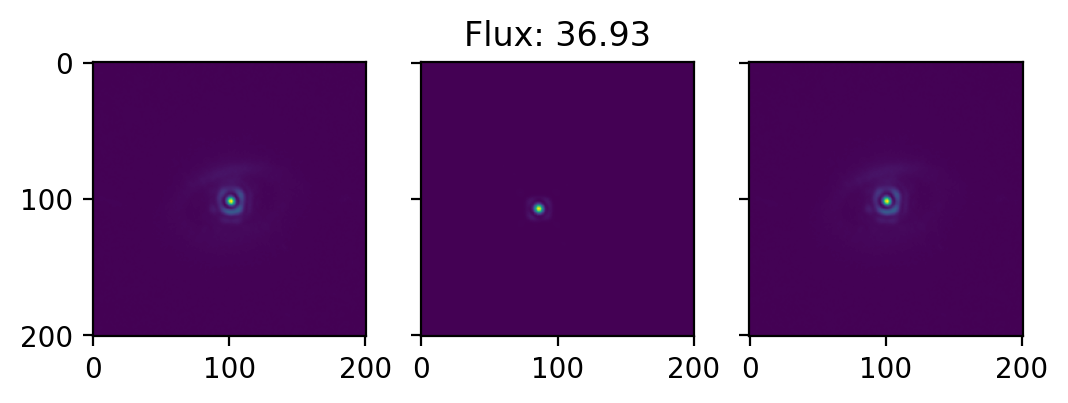

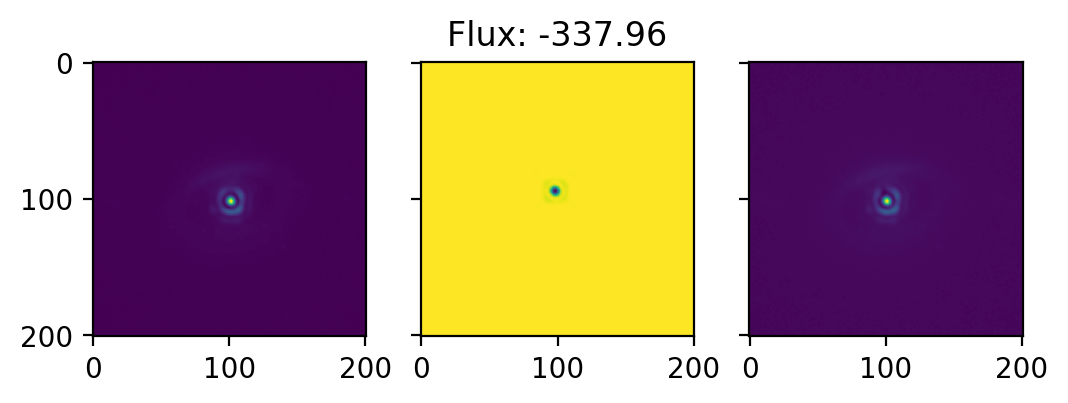

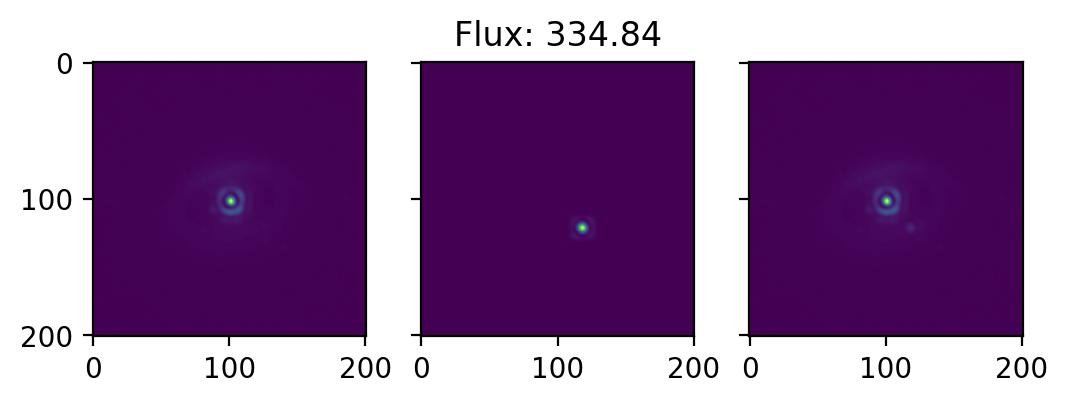

In [137]:
import numpy as np
for x_firstguess, y_firstguess, flux_firstguess in zip(x_fguess, y_fguess, f_fguess):

    fake_zeros = tfnegfc.inject_fake(x=x_firstguess, 
                                     y=y_firstguess, 
                                     flux = flux_firstguess, 
                                     cube=tf.zeros_like(cube[0]), 
                                     patch=patch, 
                                     rot_angles=rot_ang)

    fig, axes = plt.subplots(1, 3, dpi=200, sharex=True, sharey=True)
    axes[0].imshow(cube[0, 0])
    axes[1].imshow(fake_zeros[0])
    axes[2].imshow(cube[0, 0]+fake_zeros[0])
    axes[1].set_title('Flux: {:.2f}'.format(flux_firstguess[0]))
    plt.show()
